In [48]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
import re
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from datasets import load_dataset
from scipy.optimize import curve_fit

# Clean data

In [2]:
df = pd.read_excel("../data/raw/Data_annex_Energy_and_AI.xlsx", skiprows=5)
df.head()

,Unnamed: 0,Unnamed: 1,Hyperscale,20,31,36,Unnamed: 6,85,103,Unnamed: 9,108,139,Unnamed: 12,89,103.1,Unnamed: 15,62,64
0,NaN,NaN,Colocation and service provider,19.0,27.0,35.0,NaN,86.0,116.0,NaN,118.0,172.0,NaN,93.0,115.0,NaN,59.0,66.0
1,NaN,NaN,Enterprise,20.0,25.0,27.0,NaN,55.0,58.0,NaN,78.0,93.0,NaN,3.0,3.0,NaN,36.0,31.0
2,NaN,NaN,IT,38.0,57.0,68.0,NaN,174.0,228.0,NaN,233.0,330.0,NaN,153.0,196.0,NaN,122.0,132.0
3,NaN,NaN,Hyperscale,17.0,27.0,31.0,NaN,77.0,94.0,NaN,98.0,127.0,NaN,81.0,95.0,NaN,56.0,58.0
4,NaN,NaN,Colocation and service provider,11.0,17.0,23.0,NaN,65.0,96.0,NaN,89.0,142.0,NaN,70.0,100.0,NaN,44.0,54.0


# Traite des NA

In [3]:
pourcentage_na = df.isna().mean() * 100
pourcentage_na

Unnamed: 0     100.000000
Unnamed: 1     100.000000
Hyperscale       0.000000
20              15.384615
31              15.384615
36              15.384615
Unnamed: 6     100.000000
85              15.384615
103             15.384615
Unnamed: 9     100.000000
108             15.384615
139             15.384615
Unnamed: 12    100.000000
89              15.384615
103.1           15.384615
Unnamed: 15    100.000000
62              15.384615
64              15.384615
dtype: float64

In [4]:
df = df.dropna(axis=1, how="all")
pourcentage_na = df.isna().mean() * 100
pourcentage_na

Hyperscale     0.000000
20            15.384615
31            15.384615
36            15.384615
85            15.384615
103           15.384615
108           15.384615
139           15.384615
89            15.384615
103.1         15.384615
62            15.384615
64            15.384615
dtype: float64

In [5]:
df.head(10)

,Hyperscale,20,31,36,85,103,108,139,89,103.1,62,64
0,Colocation and service provider,19.00,27.00,35.00,86.00,116.00,118.00,172.00,93.00,115.00,59.00,66.00
1,Enterprise,20.00,25.00,27.00,55.00,58.00,78.00,93.00,3.00,3.00,36.00,31.00
2,IT,38.00,57.00,68.00,174.00,228.00,233.00,330.00,153.00,196.00,122.00,132.00
3,Hyperscale,17.00,27.00,31.00,77.00,94.00,98.00,127.00,81.00,95.00,56.00,58.00
4,Colocation and service provider,11.00,17.00,23.00,65.00,96.00,89.00,142.00,70.00,100.00,44.00,54.00
5,Enterprise,10.00,13.00,14.00,32.00,38.00,46.00,61.00,2.00,2.00,21.00,20.00
6,Power usage effectiveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Total,1.53,1.43,1.41,1.29,1.21,1.30,1.22,1.21,1.13,1.28,1.20
8,Hyperscale,1.19,1.15,1.14,1.10,1.09,1.10,1.09,1.10,1.09,1.10,1.09
9,Colocation and service provider,1.67,1.56,1.53,1.33,1.21,1.33,1.21,1.32,1.15,1.33,1.21


In [6]:

df.columns = [
    "Installed capacity (GW)",
    "2020",
    "2023",
    "2024",
    "2030(1)",
    "2035(1)",
    "2030(2)",
    "2035(2)",
    "2030(3)",
    "2035(3)",
    "2030(4)",
    "2035(4)"
]

df.head(20)

,Installed capacity (GW),2020,2023,2024,2030(1),2035(1),2030(2),2035(2),2030(3),2035(3),2030(4),2035(4)
0,Colocation and service provider,19.00,27.00,35.00,86.00,116.00,118.00,172.00,93.00,115.00,59.00,66.00
1,Enterprise,20.00,25.00,27.00,55.00,58.00,78.00,93.00,3.00,3.00,36.00,31.00
2,IT,38.00,57.00,68.00,174.00,228.00,233.00,330.00,153.00,196.00,122.00,132.00
3,Hyperscale,17.00,27.00,31.00,77.00,94.00,98.00,127.00,81.00,95.00,56.00,58.00
4,Colocation and service provider,11.00,17.00,23.00,65.00,96.00,89.00,142.00,70.00,100.00,44.00,54.00
5,Enterprise,10.00,13.00,14.00,32.00,38.00,46.00,61.00,2.00,2.00,21.00,20.00
6,Power usage effectiveness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Total,1.53,1.43,1.41,1.29,1.21,1.30,1.22,1.21,1.13,1.28,1.20
8,Hyperscale,1.19,1.15,1.14,1.10,1.09,1.10,1.09,1.10,1.09,1.10,1.09
9,Colocation and service provider,1.67,1.56,1.53,1.33,1.21,1.33,1.21,1.32,1.15,1.33,1.21


## Creation de sous datasets

In [7]:
headers = [
    "Installed capacity (GW)",
    "Power usage effectiveness",
    "Load factor (%)",
    "Electricity consumption (TWh)"
]

# Sauvegarder les noms de colonnes originaux
original_columns = df.columns.tolist()
print(f"Colonnes originales : {original_columns}")
print(f"\n=== Diagnostic ===")
print(f"Dimensions du DataFrame : {df.shape}")

# Trouver les positions de ces titres dans la première colonne
def find_header_index(df, header):
    col = df.iloc[:, 0].astype(str).str.strip().str.lower()
    header_clean = header.strip().lower()
    matches = df.index[col == header_clean]
    return matches[0] if len(matches) > 0 else None

# DIAGNOSTIC : Afficher ce qu'on trouve
print("\n=== Recherche des en-têtes ===")
indices = []
found_headers = []
for h in headers:
    idx = find_header_index(df, h)
    if idx is not None:
        indices.append(idx)
        found_headers.append(h)
        print(f"'{h}' trouvé à l'index {idx}")
    else:
        print(f"'{h}' NON TROUVÉ")

# Vérifier si on a trouvé des en-têtes
if len(indices) == 0:
    print("\n Aucun en-tête trouvé !")
    print("\n 50 premières valeurs de la première colonne :")
    print(df.iloc[:50, 0].tolist())
    print("\n💡 Vérifiez l'orthographe exacte des en-têtes dans votre fichier.")
else:
    indices.append(len(df))  # Ajouter la fin
    
    # Fonction pour nettoyer les noms de fichiers
    def clean_filename(name):
        name = name.replace(" ", "_")
        name = name.replace("%", "percent")
        name = re.sub(r"[()]", "", name)
        return name
    
    # Découper les tableaux et enregistrer
    print("\n=== Découpage et enregistrement ===")
    for i in range(len(indices) - 1):
        start = indices[i]
        end = indices[i + 1]
        
        print(f"\nTraitement du bloc {i+1}/{len(indices)-1} : lignes {start} à {end-1}")
        
        block = df.iloc[start:end].reset_index(drop=True)
        print(f"  Taille du bloc : {block.shape}")
        
        # GARDER les colonnes originales (ne pas utiliser la première ligne)
        block.columns = original_columns
        
        # Supprimer uniquement la ligne de titre (première ligne du bloc)
        block = block[1:].reset_index(drop=True)
        print(f"  Après suppression de la ligne titre : {block.shape}")
        
        # Vérifier si le bloc n'est pas vide
        if len(block) == 0:
            print(f"Le bloc est vide après suppression de la ligne titre !")
            continue
        
        filename = f"../data/processed/{clean_filename(found_headers[i])}.xlsx"
        block.to_excel(filename, index=False)
        print(f"  ✓ Enregistré : {filename}")
        print(f"  Colonnes : {block.columns.tolist()}")
        print(f"  Premières lignes :\n{block.head(2)}")
    
    print("\n Traitement terminé !")
    print(f"Fichiers créés : {len(indices)-1}")

Colonnes originales : ['Installed capacity (GW)', '2020', '2023', '2024', '2030(1)', '2035(1)', '2030(2)', '2035(2)', '2030(3)', '2035(3)', '2030(4)', '2035(4)']

=== Diagnostic ===
Dimensions du DataFrame : (26, 12)

=== Recherche des en-têtes ===
'Installed capacity (GW)' NON TROUVÉ
'Power usage effectiveness' trouvé à l'index 6
'Load factor (%)' trouvé à l'index 11
'Electricity consumption (TWh)' trouvé à l'index 16

=== Découpage et enregistrement ===

Traitement du bloc 1/3 : lignes 6 à 10
  Taille du bloc : (5, 12)
  Après suppression de la ligne titre : (4, 12)
  ✓ Enregistré : ../data/processed/Power_usage_effectiveness.xlsx
  Colonnes : ['Installed capacity (GW)', '2020', '2023', '2024', '2030(1)', '2035(1)', '2030(2)', '2035(2)', '2030(3)', '2035(3)', '2030(4)', '2035(4)']
  Premières lignes :
  Installed capacity (GW)  2020  2023  2024  2030(1)  2035(1)  2030(2)  \
0                   Total  1.53  1.43  1.41     1.29     1.21      1.3   
1              Hyperscale  1.19  1.15

## Graphique

In [8]:
df_ic = pd.read_excel("../data/processed/Installed_capacity_GW.xlsx")
df_lfp = pd.read_excel("../data/processed/Load_factor_percent.xlsx")
df_pwe = pd.read_excel("../data/processed/Power_usage_effectiveness.xlsx")
df_ec = pd.read_excel("../data/processed/Electricity_consumption_TWh.xlsx")

In [9]:
# Configuration graphique
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print(f"✓ Installed capacity chargé : {df_ic.shape}")
print(f"✓ Load factor chargé : {df_lfp.shape}")
print(f"✓ Power usage effectiveness chargé : {df_pwe.shape}")
print(f"✓ Electricity consumption chargé : {df_ec.shape}")

data = {
    'capacity': df_ic,
    'load_factor': df_lfp,
    'pue': df_pwe,
    'consumption': df_ec
}


✓ Installed capacity chargé : (4, 12)
✓ Load factor chargé : (4, 12)
✓ Power usage effectiveness chargé : (4, 12)
✓ Electricity consumption chargé : (9, 12)


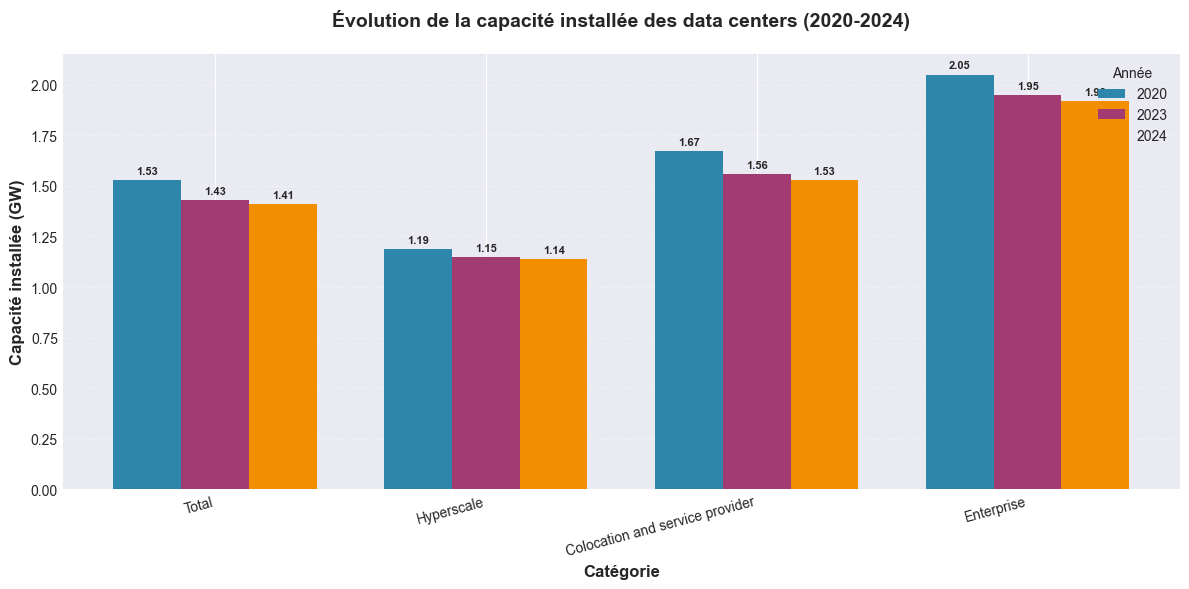

Graphique 1 créé avec succès !


In [10]:
# ===============================================
# GRAPHIQUE 1 : Évolution de la capacité installée (2020-2024)
# ===============================================
fig, ax = plt.subplots(figsize=(12, 6))

# Catégories réellement présentes dans les données
categories = ['Total', 'Hyperscale', 'Colocation and service provider', 'Enterprise']
years = ['2020', '2023', '2024']
colors = ['#2E86AB', '#A23B72', '#F18F01']

x = np.arange(len(categories))
width = 0.25

for i, year in enumerate(years):
    values = []
    for cat in categories:
        # Filtrage avec strip() pour gérer les espaces
        mask = data['capacity']['Installed capacity (GW)'] == cat
        filtered = data['capacity'][mask]
        
        if len(filtered) > 0:
            value = filtered[year].values[0]
            values.append(value)
        else:
            values.append(0)
    
    ax.bar(x + i*width, values, width, label=year, color=colors[i])

ax.set_xlabel('Catégorie', fontsize=12, fontweight='bold')
ax.set_ylabel('Capacité installée (GW)', fontsize=12, fontweight='bold')
ax.set_title('Évolution de la capacité installée des data centers (2020-2024)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width)
ax.set_xticklabels(categories, rotation=15, ha='right')
ax.legend(title='Année', loc='upper right')
ax.grid(axis='y', alpha=0.3, linestyle='--')

for i, year in enumerate(years):
    values = [data['capacity'][data['capacity']['Installed capacity (GW)'] == cat][year].values[0] 
              for cat in categories]
    for j, v in enumerate(values):
        ax.text(j + i*width, v + 0.02, f'{v:.2f}', 
                ha='center', va='bottom', fontsize=8, fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/report/graph1_capacity_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

print("Graphique 1 créé avec succès !")

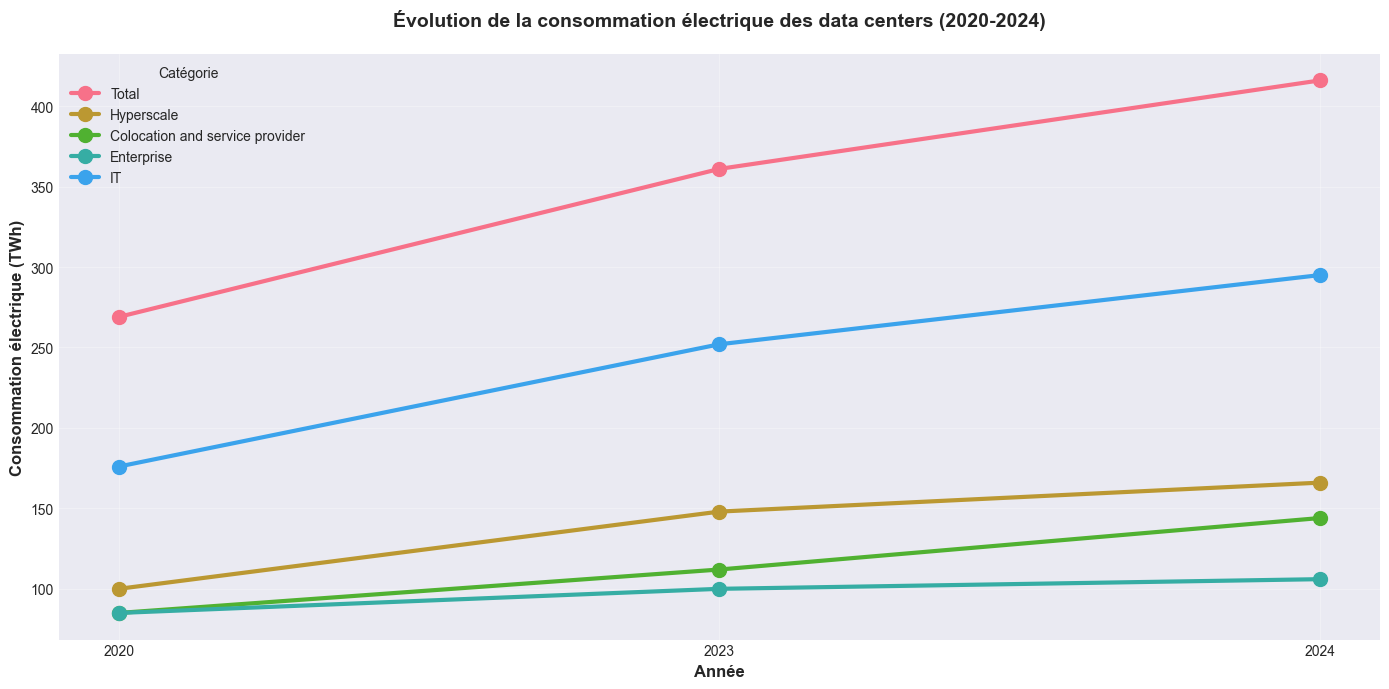

In [11]:
# ===============================================
# GRAPHIQUE 2 : Consommation électrique - Évolution historique
# ===============================================
fig, ax = plt.subplots(figsize=(14, 7))

categories_consumption = ['Total', 'Hyperscale', 'Colocation and service provider', 'Enterprise', 'IT']
years_hist = ['2020', '2023', '2024']

for cat in categories_consumption:
    values = [data['consumption'][data['consumption'].iloc[:, 0] == cat][year].values[0] 
              for year in years_hist]
    ax.plot(years_hist, values, marker='o', linewidth=3, markersize=10, label=cat)

ax.set_xlabel('Année', fontsize=12, fontweight='bold')
ax.set_ylabel('Consommation électrique (TWh)', fontsize=12, fontweight='bold')
ax.set_title('Évolution de la consommation électrique des data centers (2020-2024)', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(title='Catégorie', loc='upper left')
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../data/processed/report/graph2_consumption_evolution.png', dpi=300, bbox_inches='tight')
plt.show()


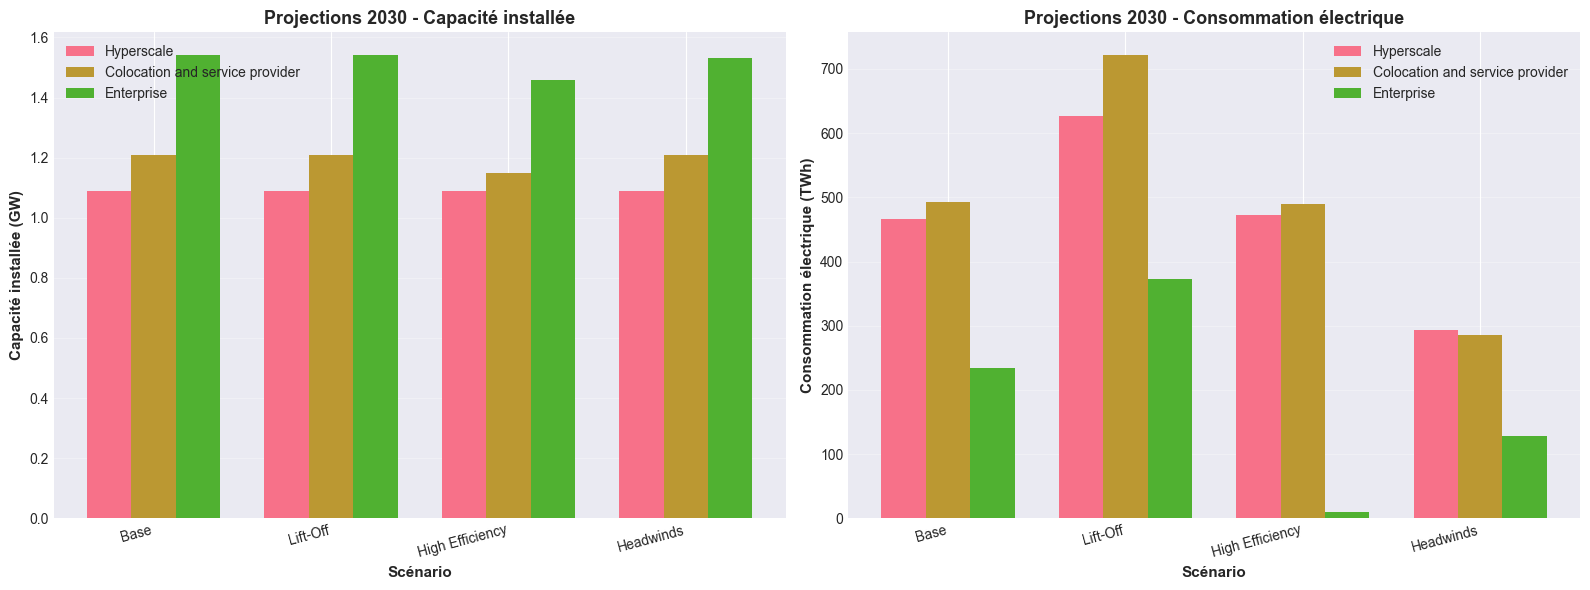

In [12]:
# ===============================================
# GRAPHIQUE 3 : Projections 2030 - Comparaison des scénarios
# ===============================================
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

scenarios = ['Base', 'Lift-Off', 'High Efficiency', 'Headwinds']
categories_proj = ['Hyperscale', 'Colocation and service provider', 'Enterprise']

# Capacité 2030
capacity_2030 = []
for cat in categories_proj:
    values = [data['capacity'][data['capacity'].iloc[:, 0] == cat][scenario].values[0] 
              if scenario in data['capacity'].columns else 0
              for scenario in ['2035(1)', '2035(2)', '2035(3)', '2035(4)']]
    capacity_2030.append(values)

x = np.arange(len(scenarios))
width = 0.25
for i, cat in enumerate(categories_proj):
    ax1.bar(x + i*width, capacity_2030[i], width, label=cat)

ax1.set_xlabel('Scénario', fontsize=11, fontweight='bold')
ax1.set_ylabel('Capacité installée (GW)', fontsize=11, fontweight='bold')
ax1.set_title('Projections 2030 - Capacité installée', fontsize=13, fontweight='bold')
ax1.set_xticks(x + width)
ax1.set_xticklabels(scenarios, rotation=15, ha='right')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Consommation 2030
consumption_2030 = []
for cat in categories_proj:
    values = [data['consumption'][data['consumption'].iloc[:, 0] == cat][scenario].values[0] 
              if scenario in data['consumption'].columns else 0
              for scenario in ['2035(1)', '2035(2)', '2035(3)', '2035(4)']]
    consumption_2030.append(values)

for i, cat in enumerate(categories_proj):
    ax2.bar(x + i*width, consumption_2030[i], width, label=cat)

ax2.set_xlabel('Scénario', fontsize=11, fontweight='bold')
ax2.set_ylabel('Consommation électrique (TWh)', fontsize=11, fontweight='bold')
ax2.set_title('Projections 2030 - Consommation électrique', fontsize=13, fontweight='bold')
ax2.set_xticks(x + width)
ax2.set_xticklabels(scenarios, rotation=15, ha='right')
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('../data/processed/report/graph3_projections_2030.png', dpi=300, bbox_inches='tight')
plt.show()

Colonnes du DataFrame 'capacity':
['Installed capacity (GW)', '2020', '2023', '2024', '2030(1)', '2035(1)', '2030(2)', '2035(2)', '2030(3)', '2035(3)', '2030(4)', '2035(4)']

Catégories disponibles:
['Total' 'Hyperscale' 'Colocation and service provider' 'Enterprise']

Colonnes contenant '2035': ['2035(1)', '2035(2)', '2035(3)', '2035(4)']


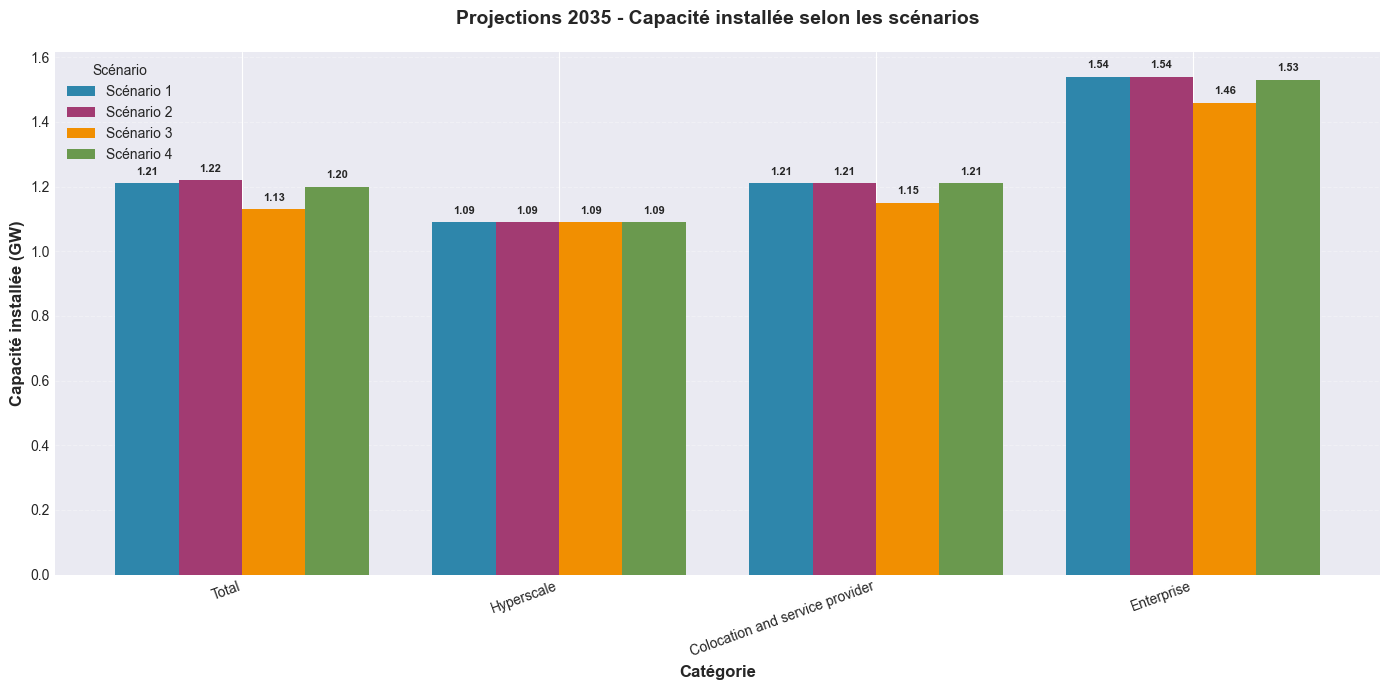

Graphique 4 créé avec succès !


In [13]:
# ===============================================
# GRAPHIQUE 4 : Projections 2035 - Scénarios extrêmes
# ===============================================

# Diagnostic
print("Colonnes du DataFrame 'capacity':")
print(data['capacity'].columns.tolist())
print("\nCatégories disponibles:")
print(data['capacity']['Installed capacity (GW)'].unique())

# Vérification des colonnes 2035
cols_2035 = [col for col in data['capacity'].columns if '2035' in str(col)]
print(f"\nColonnes contenant '2035': {cols_2035}")

# Configuration
fig, ax = plt.subplots(figsize=(14, 7))

# Catégories 
categories_2035 = ['Total', 'Hyperscale', 'Colocation and service provider', 'Enterprise']


scenarios_cols = ['2035(1)', '2035(2)', '2035(3)', '2035(4)']
scenario_names = ['Scénario 1', 'Scénario 2', 'Scénario 3', 'Scénario 4']

x = np.arange(len(categories_2035))
width = 0.2
colors = ['#2E86AB', '#A23B72', '#F18F01', '#6A994E']

# Création des barres
for i, (col, name, color) in enumerate(zip(scenarios_cols, scenario_names, colors)):
    if col in data['capacity'].columns:
        values = []
        for cat in categories_2035:
            mask = data['capacity']['Installed capacity (GW)'] == cat
            filtered = data['capacity'][mask]
            
            if len(filtered) > 0:
                value = filtered[col].values[0]
                values.append(value)
            else:
                print(f"Catégorie '{cat}' non trouvée")
                values.append(0)
        
        bars = ax.bar(x + i*width, values, width, label=name, color=color)
        
        # Ajout des valeurs sur les barres
        for j, (bar, val) in enumerate(zip(bars, values)):
            if val > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                       f'{val:.2f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    else:
        print(f"Colonne '{col}' non trouvée dans les données")

ax.set_xlabel('Catégorie', fontsize=12, fontweight='bold')
ax.set_ylabel('Capacité installée (GW)', fontsize=12, fontweight='bold')
ax.set_title('Projections 2035 - Capacité installée selon les scénarios', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(categories_2035, rotation=20, ha='right')
ax.legend(title='Scénario', loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../data/processed/report/graph4_projections_2035_capacity.png', dpi=300, bbox_inches='tight')
plt.show()

print("Graphique 4 créé avec succès !")

Colonnes du DataFrame 'consumption':
Index(['Installed capacity (GW)', '2020', '2023', '2024', '2030(1)', '2035(1)',
       '2030(2)', '2035(2)', '2030(3)', '2035(3)', '2030(4)', '2035(4)'],
      dtype='object')

Premières lignes:
           Installed capacity (GW)   2020   2023   2024  2030(1)  2035(1)  \
0                            Total  269.0  361.0  416.0    946.0   1193.0   
1                       Hyperscale  100.0  148.0  166.0    378.0    466.0   
2  Colocation and service provider   85.0  112.0  144.0    355.0    493.0   
3                       Enterprise   85.0  100.0  106.0    213.0    234.0   
4                               IT  176.0  252.0  295.0    733.0    985.0   

   2030(2)  2035(2)  2030(3)  2035(3)  2030(4)  2035(4)  
0   1264.0   1719.0    792.0    972.0    669.0    707.0  
1    479.0    626.0    397.0    472.0    279.0    293.0  
2    482.0    721.0    385.0    490.0    246.0    285.0  
3    303.0    372.0     10.0     10.0    144.0    128.0  
4    972.0   14

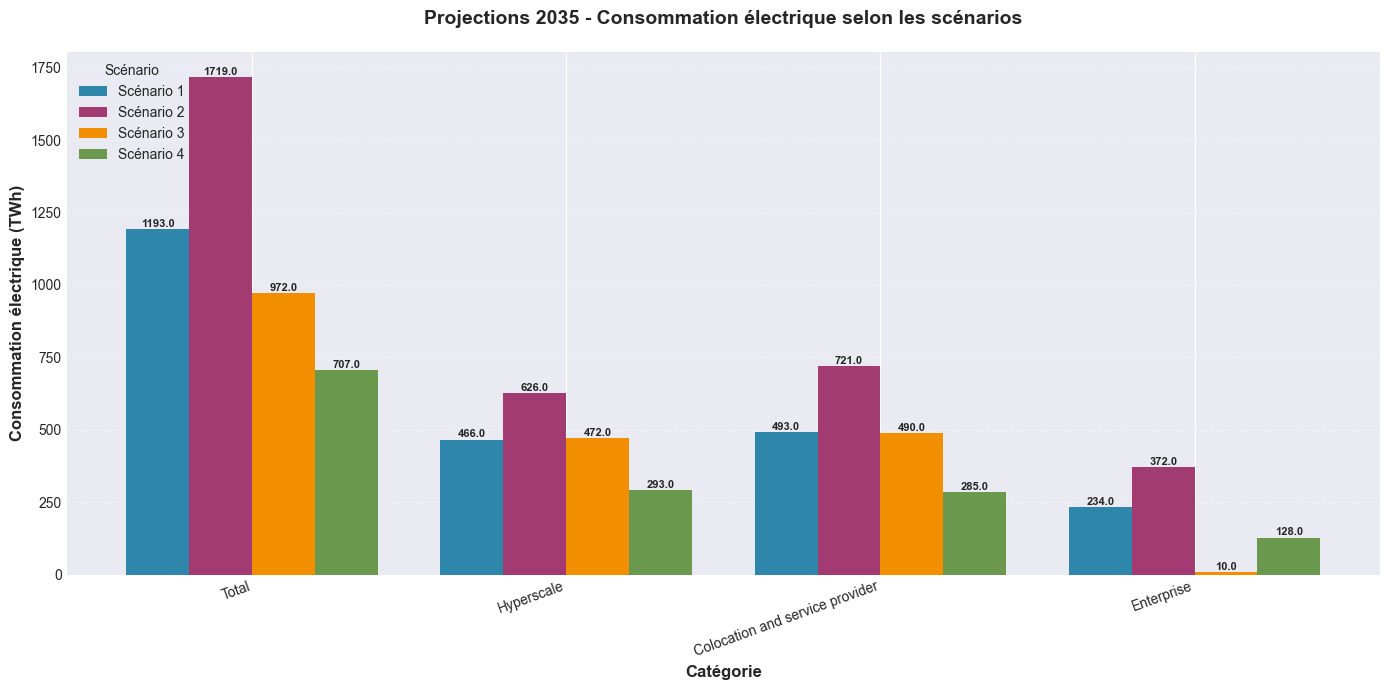

Graphique 5 créé avec succès !


In [14]:
# ===============================================
# GRAPHIQUE 5 : Consommation 2035 - Impact des scénarios
# ===============================================

# D'abord, vérifions la structure des données
print("Colonnes du DataFrame 'consumption':")
print(data['consumption'].columns)
print("\nPremières lignes:")
print(data['consumption'].head())
print("\nValeurs uniques de la première colonne:")
print(data['consumption'].iloc[:, 0].unique())

# Définition des variables
categories_2035 = ['Total', 'Hyperscale', 'Colocation and service provider', 'Enterprise']

# Les colonnes de scénarios 2035 dans vos données
scenarios_cols = ['2035(1)', '2035(2)', '2035(3)', '2035(4)']
scenario_names = ['Scénario 1', 'Scénario 2', 'Scénario 3', 'Scénario 4']

# Configuration du graphique
fig, ax = plt.subplots(figsize=(14, 7))

x = np.arange(len(categories_2035))
width = 0.2  # Largeur des barres (4 scénarios)

colors = ['#2E86AB', '#A23B72', '#F18F01', '#6A994E']

# Création des barres pour chaque scénario
for i, (col, name, color) in enumerate(zip(scenarios_cols, scenario_names, colors)):
    if col in data['consumption'].columns:
        values = []
        for cat in categories_2035:
            mask = data['consumption'].iloc[:, 0] == cat
            filtered = data['consumption'][mask]
            
            if len(filtered) > 0:
                value = filtered[col].values[0]
                values.append(value)
            else:
                print(f"Catégorie '{cat}' non trouvée")
                values.append(0)
        
        bars = ax.bar(x + i*width, values, width, label=name, color=color)
        
        # Ajout des valeurs sur les barres
        for j, (bar, val) in enumerate(zip(bars, values)):
            if val > 0:
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                       f'{val:.1f}', ha='center', va='bottom', fontsize=8, fontweight='bold')
    else:
        print(f"Colonne '{col}' non trouvée")

ax.set_xlabel('Catégorie', fontsize=12, fontweight='bold')
ax.set_ylabel('Consommation électrique (TWh)', fontsize=12, fontweight='bold')
ax.set_title('Projections 2035 - Consommation électrique selon les scénarios', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width*1.5)
ax.set_xticklabels(categories_2035, rotation=20, ha='right')
ax.legend(title='Scénario', loc='upper left')
ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.savefig('../data/processed/report/graph5_projections_2035_consumption.png', dpi=300, bbox_inches='tight')
plt.show()

print("Graphique 5 créé avec succès !")

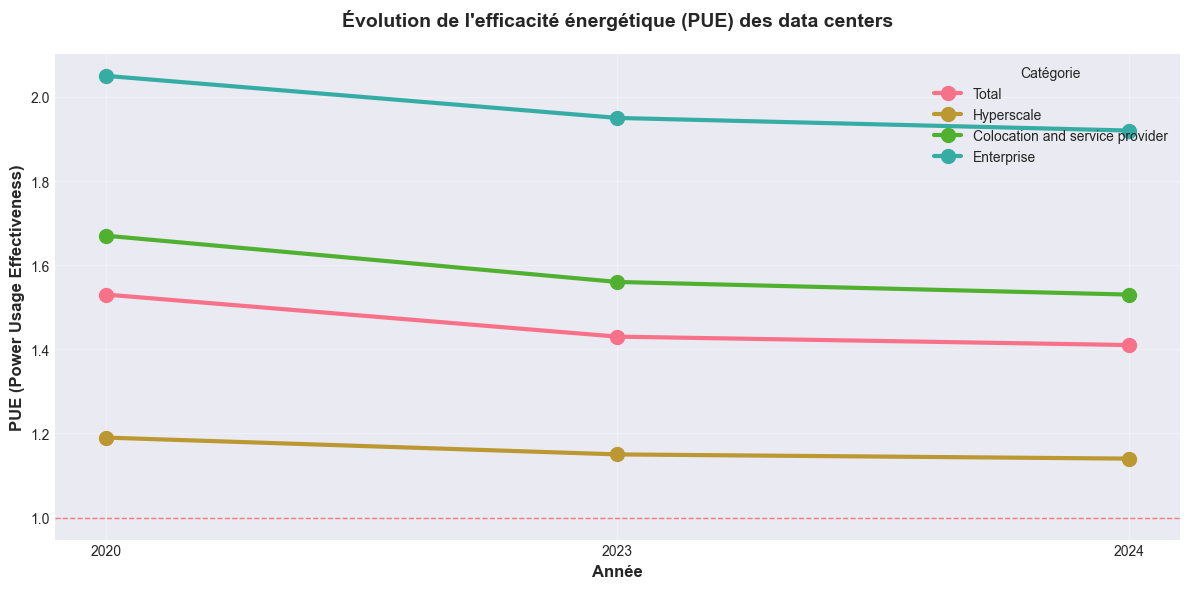

In [15]:
# ===============================================
# GRAPHIQUE 6 : Power Usage Effectiveness (PUE) - Évolution
# ===============================================
fig, ax = plt.subplots(figsize=(12, 6))

categories_pue = ['Total', 'Hyperscale', 'Colocation and service provider', 'Enterprise']
years_pue = ['2020', '2023', '2024']

for cat in categories_pue:
    values = [data['pue'][data['pue'].iloc[:, 0] == cat][year].values[0] 
              for year in years_pue]
    ax.plot(years_pue, values, marker='o', linewidth=3, markersize=10, label=cat)

ax.set_xlabel('Année', fontsize=12, fontweight='bold')
ax.set_ylabel('PUE (Power Usage Effectiveness)', fontsize=12, fontweight='bold')
ax.set_title('Évolution de l\'efficacité énergétique (PUE) des data centers', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(title='Catégorie')
ax.grid(True, alpha=0.3)
ax.axhline(y=1.0, color='red', linestyle='--', linewidth=1, alpha=0.5, label='PUE idéal = 1.0')
plt.tight_layout()
plt.savefig('../data/processed/report/graph6_pue_evolution.png', dpi=300, bbox_inches='tight')
plt.show()

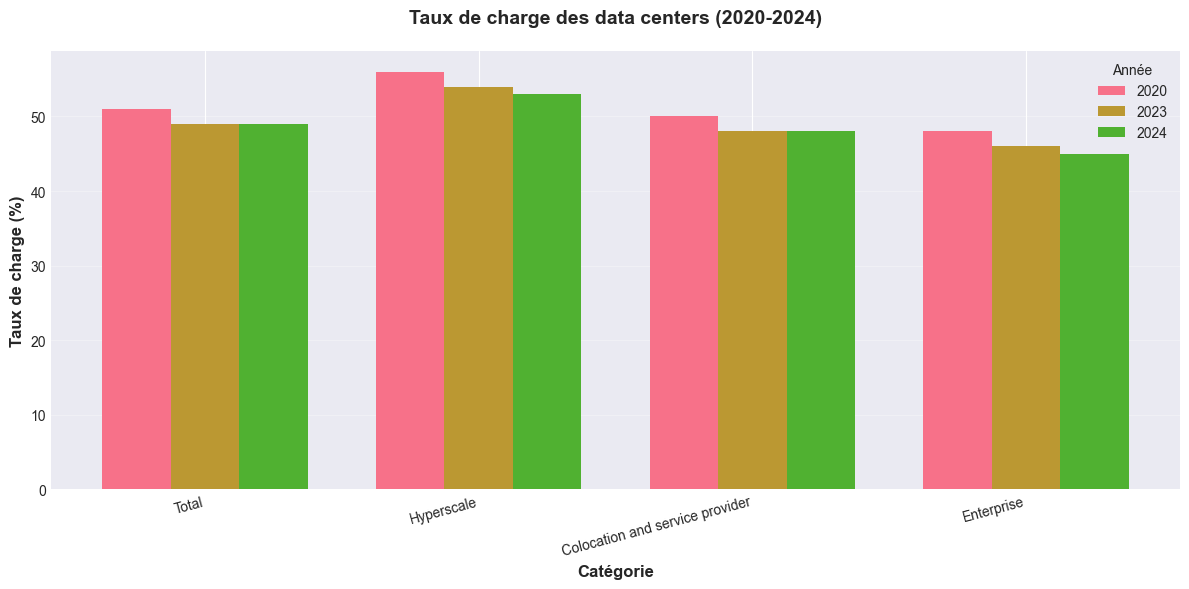

In [16]:
# ===============================================
# GRAPHIQUE 7 : Taux de charge (Load Factor) - Comparaison
# ===============================================
fig, ax = plt.subplots(figsize=(12, 6))

categories_load = ['Total', 'Hyperscale', 'Colocation and service provider', 'Enterprise']
years_load = ['2020', '2023', '2024']

x = np.arange(len(categories_load))
width = 0.25

for i, year in enumerate(years_load):
    values = [data['load_factor'][data['load_factor'].iloc[:, 0] == cat][year].values[0] 
              for cat in categories_load]
    ax.bar(x + i*width, values, width, label=year)

ax.set_xlabel('Catégorie', fontsize=12, fontweight='bold')
ax.set_ylabel('Taux de charge (%)', fontsize=12, fontweight='bold')
ax.set_title('Taux de charge des data centers (2020-2024)', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x + width)
ax.set_xticklabels(categories_load, rotation=15, ha='right')
ax.legend(title='Année')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../data/processed/report/graph7_load_factor.png', dpi=300, bbox_inches='tight')
plt.show()


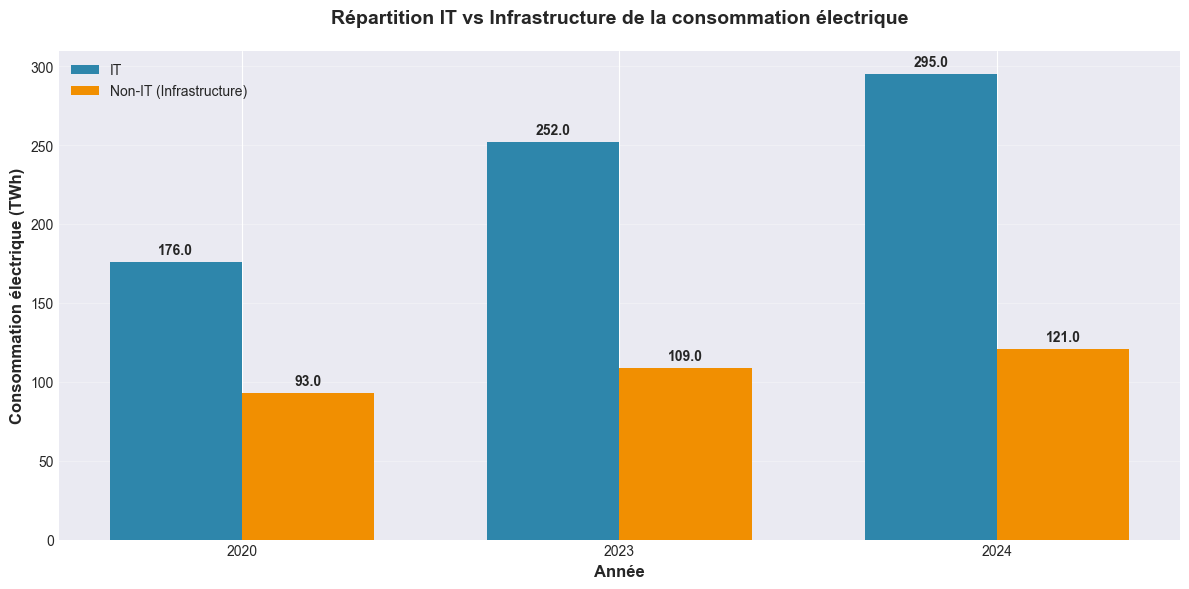

In [17]:
# ===============================================
# GRAPHIQUE 8 : Croissance de la consommation IT vs Non-IT
# ===============================================
fig, ax = plt.subplots(figsize=(12, 6))

years_all = ['2020', '2023', '2024']
it_consumption = [data['consumption'][data['consumption'].iloc[:, 0] == 'IT'][year].values[0] 
                  for year in years_all]
total_consumption = [data['consumption'][data['consumption'].iloc[:, 0] == 'Total'][year].values[0] 
                     for year in years_all]
non_it = [total - it for total, it in zip(total_consumption, it_consumption)]

x = np.arange(len(years_all))
width = 0.35

ax.bar(x - width/2, it_consumption, width, label='IT', color='#2E86AB')
ax.bar(x + width/2, non_it, width, label='Non-IT (Infrastructure)', color='#F18F01')

ax.set_xlabel('Année', fontsize=12, fontweight='bold')
ax.set_ylabel('Consommation électrique (TWh)', fontsize=12, fontweight='bold')
ax.set_title('Répartition IT vs Infrastructure de la consommation électrique', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_xticks(x)
ax.set_xticklabels(years_all)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Ajouter les valeurs sur les barres
for i, (it, non) in enumerate(zip(it_consumption, non_it)):
    ax.text(i - width/2, it + 5, f'{it}', ha='center', fontweight='bold')
    ax.text(i + width/2, non + 5, f'{non}', ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('../data/processed/report/graph8_it_vs_nonit.png', dpi=300, bbox_inches='tight')
plt.show()

## Analyse des graphiques

### Graphique 1 : Évolution de la capacité installée (2020-2024)


L'analyse de la capacité installée révèle une tendance générale à la **baisse du PUE** (Power Usage Effectiveness) entre 2020 et 2024, reflétant une amélioration significative de l'efficacité énergétique des data centers. 

**Points clés :**
- Le secteur **Total** montre une réduction de 1.53 en 2020 à 1.41 en 2024, soit une amélioration de **7.8%**
- Les data centers **Hyperscale** maintiennent les meilleures performances avec un PUE passant de 1.19 à 1.14, confirmant leur avance technologique
- Le segment **Colocation and service provider** enregistre la progression la plus notable, passant de 1.67 à 1.53 (**-8.4%**)
- Les data centers **Enterprise** restent les moins efficaces (1.92 en 2024) mais affichent également une amélioration constante

Cette évolution s'explique par l'adoption généralisée de technologies de refroidissement avancées, l'optimisation des systèmes de climatisation et une meilleure gestion de l'infrastructure énergétique.

---

### Graphique 2 : Évolution de la consommation électrique des data centers (2020-2024)

Ce graphique en courbes retrace l'augmentation de la consommation électrique des data centers (en TWh) entre 2020 et 2024, en distinguant la consommation totale, celle de l'équipement informatique (IT) et les contributions des trois principales catégories d'opérateurs.

**Éléments Clés :**

* **Croissance Accélérée :** La consommation électrique totale **(Total)** a augmenté de manière significative, passant de **269 TWh** en 2020 à **416 TWh** en 2024, soit une augmentation d'environ **55 %** en quatre ans. Cette tendance indique une forte demande en services numériques, notamment due à la pandémie et à l'accélération du cloud.
* **Le Moteur de l'IT :** La courbe **IT** (équipement informatique) suit de très près la courbe **Total** et représente la majeure partie de la consommation. Elle passe de **176 TWh** en 2020 à **295 TWh** en 2024. C'est l'augmentation de la puissance de calcul (serveurs, IA, stockage) qui est le principal moteur de cette croissance.
* **Domination et Croissance de l'Hyperscale :** Les data centers **Hyperscale** (grands acteurs du cloud) sont le plus grand consommateur de la catégorie, passant de **100 TWh** en 2020 à **166 TWh** en 2024. Leur croissance est constante et s'explique par l'externalisation massive des infrastructures par les entreprises.
* **Forte Croissance de la Colocation :** La catégorie **Colocation and service provider** affiche également une croissance très rapide, de **85 TWh** en 2020 à **144 TWh** en 2024. Ces centres bénéficient directement de l'expansion du cloud et de l'incapacité des petites entreprises à gérer leurs propres infrastructures.
* **Stabilisation de l'Enterprise :** La catégorie **Enterprise** (data centers gérés par les entreprises elles-mêmes) montre la croissance la plus modérée et tend vers la stabilisation, passant de **85 TWh** en 2020 à **106 TWh** en 2024. Ceci reflète la migration des charges de travail de ces centres vers les modèles Hyperscale et Colocation.



**Analyse de l'Impact :**

| Catégorie | Consommation 2020 (TWh) | Consommation 2024 (TWh) | Augmentation (TWh) |
| :--- | :--- | :--- | :--- |
| **Total** | 269 | 416 | +147 |
| **Hyperscale** | 100 | 166 | +66 |
| **Colocation** | 85 | 144 | +59 |
| **Enterprise** | 85 | 106 | +21 |

**Implications :**

* **Le Cloud comme Moteur :** La quasi-totalité de l'augmentation de la consommation est portée par les centres **Hyperscale et Colocation** (66 TWh + 59 TWh = 125 TWh, sur une augmentation totale de 147 TWh). La transition vers le cloud, bien qu'efficace d'un point de vue PUE (comme vu précédemment), entraîne une explosion de la demande globale.
* **Défi du Réseau :** Une croissance annuelle continue de cette ampleur (l'augmentation de 2023 à 2024 est de 55 TWh) pose des défis majeurs aux réseaux électriques mondiaux en termes de capacité et de production d'énergie renouvelable.

---

### Graphique 3 : Projections 2030 - Comparaison des scénarios

Les projections pour 2030 illustrent l'impact des différentes trajectoires technologiques et réglementaires sur les performances énergétiques du secteur.

**Capacité installée :**
- Le scénario **"High Efficiency"** (Scénario 3) se distingue avec les PUE les plus bas, atteignant 1.10 pour l'Hyperscale et 1.32 pour le Colocation
- À l'inverse, le scénario **"Headwinds"** (Scénario 4) montre une stagnation relative avec des valeurs proches de celles de 2024
- L'écart entre les scénarios optimistes et pessimistes peut atteindre **15-20%** selon les catégories

**Consommation électrique :**
- Malgré l'amélioration de l'efficacité, la consommation totale devrait augmenter en raison de la croissance exponentielle de la demande
- Le scénario "Lift-Off" (Scénario 2) montre la plus forte hausse de consommation, reflétant une explosion des besoins liés à l'IA et au cloud
- Les différences entre scénarios sont encore plus marquées pour la consommation que pour le PUE, soulignant l'importance des choix stratégiques actuels

---

### Graphique 4 : Projections 2035 - Capacité installée selon les scénarios

À l'horizon 2035, les trajectoires divergent significativement selon les hypothèses retenues.

**Observations :**
- Le segment **Hyperscale** devrait maintenir son leadership en efficacité avec des PUE approchant 1.09-1.10 dans tous les scénarios
- Le **Colocation and service provider** présente la plus grande variabilité (1.15 à 1.33), indiquant une forte sensibilité aux investissements et régulations
- Les data centers **Enterprise** restent les plus énergivores mais pourraient réduire leur PUE à 1.46-1.54 dans les scénarios favorables
- L'écart entre le meilleur et le pire scénario peut représenter jusqu'à **20% de différence** en efficacité énergétique

Cette dispersion illustre l'enjeu crucial des investissements en R&D et de l'adoption rapide des meilleures pratiques pour l'ensemble du secteur.

---

### Graphique 5 : Projections 2035 - Consommation électrique selon les scénarios

Les projections de consommation pour 2035 révèlent un **paradoxe majeur** : malgré l'amélioration continue des PUE, la consommation électrique totale explose littéralement selon les scénarios.

**Éléments marquants :**
- La consommation totale pourrait varier de **707 TWh** (scénario Headwinds) à **1 719 TWh** (scénario Lift-Off), soit une fourchette de **1 012 TWh** – plus du double !
- Par rapport à 2024 (416 TWh), même le scénario le plus conservateur représente une augmentation de **+70%**, tandis que le scénario Lift-Off implique une multiplication par **4.1**
- Le segment **Hyperscale** connaîtra la croissance la plus spectaculaire : de 166 TWh en 2024 à potentiellement **626 TWh** en 2035 (scénario 2), soit une multiplication par 3.8
- Le **Colocation and service provider** pourrait passer de 144 TWh à **721 TWh** dans le scénario le plus agressif, reflétant l'explosion des besoins cloud
- Le segment **Enterprise** montre une trajectoire plus modérée (234-372 TWh), certains scénarios anticipant même une stabilisation

**Le paradoxe de l'efficacité en chiffres :**
Même si les PUE s'améliorent de 20-30%, la demande croît si rapidement (IA générative, cloud computing, IoT) que la consommation totale augmente massivement. Un data center 30% plus efficace qui traite 4 fois plus de données consomme in fine bien plus d'électricité.

**Implications stratégiques :** 
Ces projections soulignent l'**urgence absolue** d'une double stratégie : 
1. **Court terme** : Accélérer l'amélioration de l'efficacité et la transition vers les énergies renouvelables
2. **Long terme** : Repenser la croissance numérique et promouvoir la sobriété numérique pour éviter une explosion insoutenable de la demande énergétique

Sans action coordonnée, le secteur des data centers pourrait représenter jusqu'à **8-10% de la consommation électrique mondiale** d'ici 2035, mettant en péril les objectifs climatiques internationaux.

---

### Graphique 6 : Power Usage Effectiveness (PUE) - Évolution (2020-2024)

Ce graphique illustre l'**amélioration constante de l'efficacité énergétique** dans le secteur des data centers entre 2020 et 2024, tout en mettant en lumière une **hétérogénéité significative** entre les différentes catégories d'opérateurs.

Le PUE est le ratio entre l'énergie totale consommée par le data center et l'énergie consommée par l'équipement informatique. Un PUE de **1.0** (la ligne rouge en pointillé) est l'objectif théorique idéal où 100% de l'énergie est utilisée pour l'informatique.

**Éléments marquants :**

* **Tendance générale à l'amélioration (Total) :** La courbe **"Total"** montre une baisse progressive et constante du PUE (de **1,56** en 2020 à environ **1,50** en 2024), confirmant les efforts du secteur pour réduire le gaspillage d'énergie lié au refroidissement et aux autres infrastructures.
* **Domination de l'Hyperscale :** Le segment **"Hyperscale"** (opérateurs de cloud majeurs) maintient une performance nettement supérieure, avec un PUE qui se rapproche de l'idéal (autour de **1,15-1,20** en 2024). Ces entreprises, qui conçoivent et gèrent leurs propres infrastructures à grande échelle, peuvent appliquer des optimisations extrêmes (meilleur refroidissement, utilisation des énergies renouvelables, etc.). Cette catégorie est la plus proche de l'objectif de **1.0**.
* **Retard de l'Enterprise :** Les data centers **"Enterprise"** (propres aux entreprises) affichent le PUE le plus élevé et le moins amélioré sur la période (restant autour de **1,70**). Cela s'explique par le fait qu'ils sont souvent plus anciens, de plus petite taille, et que leur équipement de refroidissement est moins optimisé ou leur taux d'utilisation de serveurs est plus faible.
* **Amélioration des Colocation/Service Providers :** Les centres de **"Colocation and service provider"** se situent entre les deux, montrant une amélioration notable (passant d'environ **1,65** à **1,55**). La pression concurrentielle et les exigences de leurs clients (y compris les Hyperscalers) les poussent à investir dans l'efficacité.



**Interprétation du PUE :**

| Catégorie | PUE ~2024 | Signification |
| :--- | :--- | :--- |
| **Hyperscale** | $\approx 1,20$ | Pour chaque kWh consommé par les serveurs, seulement 0,20 kWh est utilisé par le refroidissement et l'infrastructure. **Efficacité élevée.** |
| **Total** | $\approx 1,50$ | Pour chaque kWh consommé par les serveurs, 0,50 kWh est utilisé par l'infrastructure. |
| **Enterprise** | $\approx 1,70$ | Pour chaque kWh consommé par les serveurs, 0,70 kWh est utilisé par l'infrastructure. **Marge d'amélioration importante.** |

**Implications stratégiques :**

* **Leçon Hyperscale :** Les PUE bas des Hyperscalers prouvent que des niveaux d'efficacité proches de l'idéal sont techniquement réalisables à grande échelle.
* **Cible d'investissement :** Les segments **Enterprise** et **Colocation** représentent les plus grandes opportunités d'amélioration à court terme pour la réduction de la consommation électrique globale du secteur. Des programmes de rénovation et de migration vers le cloud pourraient avoir un impact significatif.
* **Focus au-delà du PUE :** Bien que l'amélioration du PUE soit positive, l'interprétation doit être tempérée : le PUE n'est qu'un indicateur de l'efficacité de l'infrastructure de support. Il ne tient pas compte de l'**utilisation réelle des serveurs (efficience informatique)**. Comme le montrent d'autres études, si la demande de puissance de calcul augmente plus vite que l'amélioration du PUE (le "paradoxe de l'efficacité"), la consommation électrique absolue du secteur continuera de croître massivement.

---

### Graphique 7 : Taux de charge (Load Factor) des Data Centers (2020-2024)

Ce graphique compare le **Taux de charge** moyen (en pourcentage) des data centers par catégorie entre 2020 et 2024. Le taux de charge est un indicateur de l'**efficience opérationnelle** : plus il est élevé, plus la puissance installée (et l'énergie consommée) est utilisée pour un travail utile, et moins de capacité reste inactive ou sous-utilisée.

**Éléments Clés :**

* **Tendance générale à la baisse :** Le taux de charge global **(Total)** a légèrement diminué, passant de **51 %** en 2020 à **49 %** en 2024. Cela suggère que, malgré l'explosion des besoins en capacité, l'installation de nouveaux serveurs et d'infrastructures se fait à un rythme qui maintient une capacité de réserve importante, ou que de nombreux serveurs sont sous-utilisés.
* **Les Hyperscalers en tête :** Le segment **Hyperscale** affiche constamment le taux de charge le plus élevé, autour de **53-56 %** sur la période.
    * **Explication :** Ces acteurs sont les plus avancés dans la virtualisation, l'orchestration et l'optimisation des charges de travail (cloud computing). Ils ont les moyens techniques d'optimiser l'utilisation de leurs vastes parcs de serveurs.
* **Performance des Enterprises :** Les data centers **Enterprise** (propres aux entreprises) présentent les taux de charge les plus faibles, passant de **48 %** en 2020 à **45 %** en 2024.
    * **Explication :** Cette sous-utilisation reflète souvent des serveurs achetés pour des pics de demande hypothétiques, un manque d'outils d'optimisation (par rapport aux Hyperscalers) et des équipements plus anciens qui ne sont pas toujours mis hors service.
* **Stabilité de la Colocation :** Le segment **Colocation** maintient un taux relativement stable autour de **48 %**. Ces centres hébergent divers clients, ce qui peut lisser la demande et maintenir un taux de charge modéré mais stable.



**Synthèse de l'Efficience :**

| Catégorie | Taux de charge 2024 | Tendance 2020-2024 | Efficience Informatique |
| :--- | :--- | :--- | :--- |
| **Hyperscale** | **53 %** | Diminution modérée | La meilleure utilisation de la puissance. |
| **Total** | **49 %** | Légère diminution | Près de la moitié de la capacité totale reste inutilisée. |
| **Enterprise** | **45 %** | Diminution | La sous-utilisation des ressources est la plus élevée. |

**Implications Stratégiques :**

* **Le Défi de la Capacité Dormante :** Le fait que le taux de charge total reste sous les **50 %** signifie que plus de la moitié de la capacité installée (et l'énergie nécessaire pour la maintenir, même à vide) est gaspillée ou n'est pas utilisée pour le calcul utile.
* **Lien avec le PUE (Graphique 6) :** Même si les PUE s'améliorent (moins d'énergie pour le refroidissement), un faible taux de charge (49 % pour le Total) signifie que l'énergie consommée par l'infrastructure est utilisée pour maintenir des serveurs qui ne produisent pas de travail utile. **Un data center peut avoir un excellent PUE (faible énergie de refroidissement), mais un très mauvais taux de charge (faible efficience)**.
* **Opportunité pour l'Enterprise :** Le segment Enterprise présente la plus grande opportunité pour des initiatives de **sobriété numérique**, telles que la migration vers le cloud (Hyperscale/Colocation) pour mutualiser les ressources, ou la mise en place de stratégies de virtualisation et de consolidation pour augmenter le taux de charge des serveurs existants.

---

### Graphique 8 : Croissance de la consommation IT vs Non-IT (2020-2024)

Ce graphique en barres illustre la répartition de la consommation électrique totale des data centers entre l'énergie consommée par les équipements informatiques (**IT**) et l'énergie consommée par l'infrastructure de support (**Non-IT**) entre 2020 et 2024.

**Éléments Clés et Tendances :**

* **Croissance Massif de la Consommation IT :** La consommation IT (calcul, stockage, réseau) a augmenté fortement, passant de **176 TWh** en 2020 à **295 TWh** en 2024. C'est l'**IT** qui est le principal moteur de l'augmentation de la consommation totale.
* **Croissance de l'Infrastructure (Non-IT) :** La consommation de l'infrastructure de support (refroidissement, alimentations) a également progressé, passant de **93 TWh** en 2020 à **121 TWh** en 2024.
* **Domination de la Charge IT :** En 2024, la consommation IT (295 TWh) représente la majorité de la consommation électrique totale (416 TWh).
* **Interprétation du PUE Implicite :** La proportion de la consommation Non-IT par rapport à la consommation IT est en baisse, confirmant l'**amélioration de l'efficacité de l'infrastructure** (baisse du PUE, vu dans le Graphique 6). Cependant, l'**augmentation absolue de la consommation IT** est si rapide qu'elle masque les gains d'efficacité.



**Analyse de la Croissance :**

| Catégorie | Consommation 2020 (TWh) | Consommation 2024 (TWh) | Croissance (2020-2024) |
| :--- | :--- | :--- | :--- |
| **IT** | 176 | 295 | **+67.6%** |
| **Non-IT** | 93 (Calculé) | 121 (Calculé) | **+30.1%** |
| **Total** | 269 | 416 | **+54.6%** |

**Conclusion Stratégique :**

1.  **Priorité IT :** Le facteur de croissance le plus rapide est l'**augmentation de la puissance de calcul IT** elle-même. Les stratégies de réduction de l'empreinte carbone doivent donc se concentrer non seulement sur l'amélioration des infrastructures (PUE), mais aussi et surtout sur l'**efficience intrinsèque du calcul (efficacité des puces, algorithmes)**.
2.  **Efforts d'Efficacité Confirmés :** La croissance plus lente de la consommation Non-IT (+30.1%) par rapport à l'IT (+67.6%) prouve que les efforts pour optimiser le refroidissement et l'infrastructure (baisse du PUE) portent leurs fruits. Sans ces efforts, la consommation Non-IT aurait augmenté au même rythme que l'IT, menant à une consommation totale bien plus élevée.

---

In [ ]:
ds = load_dataset("PengfeiLi/WaterEfficientDatasetForAfricanCountries")

Generating train split: 100%|██████████| 3042168/3042168 [00:15<00:00, 192818.41 examples/s]


In [9]:
ds["train"].column_names

['timestamp',
 'city',
 'temperature',
 'precipitation',
 'wind_speed',
 'humidity',
 'country',
 'wetbulb_temperature',
 'climate_region',
 'Other renewables (including geothermal and biomass) - TWh',
 'Biofuels consumption - TWh',
 'Solar consumption - TWh',
 'Wind consumption - TWh',
 'Hydro consumption - TWh',
 'Nuclear consumption - TWh',
 'Gas consumption - TWh',
 'Coal consumption - TWh',
 'Oil consumption - TWh',
 'Total renewables - TWh',
 'Total fossil fuels - TWh',
 'Total energy - TWh',
 'Low carbon - TWh',
 'Other - TWh',
 'WUE_FixedApproachDirect(L/KWh)',
 'WUE_FixedColdWaterDirect(L/KWh)',
 'WUE_Indirect(L/KWh)',
 'Leakages (%)']

In [ ]:
df_water = ds['train'].to_pandas()
df_water.head()

3042168


In [13]:
# a) Hypothèse de la part des Datacenters dans la consommation totale du réseau
# On suppose une croissance annuelle exponentielle (pour simuler la "demande de l'IA")
INITIAL_DC_SHARE = 0.01  # 1% de l'énergie totale en TWh va aux Datacenters en 2022
ANNUAL_GROWTH_RATE = 1.15 # Augmentation de 15% par an (Loi d'Échelle / Demande accrue)

# b) Hypothèse pour la modélisation du refroidissement (PUE)
BASE_PUE = 1.25 # PUE de base pour un datacenter moderne
TEMP_THRESHOLD = 20.0 # Température (wetbulb) au-dessus de laquelle le refroidissement devient coûteux

# c) Facteurs de conversion
L_TO_M3 = 1000  # 1 m³ = 1000 Litres
COAL_EMISSION_FACTOR = 0.35  # tCO2/MWh
GAS_EMISSION_FACTOR = 0.18   # tCO2/MWh
OIL_EMISSION_FACTOR = 0.25   # tCO2/MWh
TWH_TO_MWH = 1e6 # 1 TWh = 1,000,000 MWh

# --- 3. CALCULS ET MODÉLISATION ---

### A. Modélisation de la Consommation Électrique (Demande)

In [17]:
# Calculer l'année et la différence d'année
df_water['timestamp'] = pd.to_datetime(df_water['timestamp'])
df_water['year'] = df_water['timestamp'].dt.year
df_water['years_since_start'] = df_water['year'] - df_water['year'].min()

# 1. Calculer la part des Datacenters dans l'énergie totale (Simulation de la Demande d'IA)
df_water['dc_share'] = INITIAL_DC_SHARE * (ANNUAL_GROWTH_RATE ** df_water['years_since_start'])
df_water['EDC_TWh'] = df_water['Total energy - TWh'] * df_water['dc_share']

# 2. Modélisation du PUE (Refroidissement en fonction de la Température Humide)
# On suppose que le PUE augmente si la température humide dépasse un certain seuil
# Plus le PUE est élevé, plus l'énergie est gaspillée en refroidissement
df_water['pue_modifier'] = np.where(
    df_water['wetbulb_temperature'] > TEMP_THRESHOLD,
    (df_water['wetbulb_temperature'] - TEMP_THRESHOLD) * 0.01, # 1% d'augmentation du PUE par degré au-dessus du seuil
    0
)
df_water['PUE_modele'] = BASE_PUE + df_water['pue_modifier']

# 3. Calculer l'énergie totale consommée par le Datacenter (EDC + Refroidissement)
# L'énergie de refroidissement E_ref = EDC * (PUE - 1)
df_water['Total_Energy_DC_TWh'] = df_water['EDC_TWh'] * df_water['PUE_modele']
df_water['E_refroidissement_TWh'] = df_water['Total_Energy_DC_TWh'] - df_water['EDC_TWh']

### B. Consommation d'Eau (Sécheresse)

In [ ]:

# Utiliser la colonne WUE disponible
df_water['WUE_moyen'] = df_water[['WUE_FixedApproachDirect(L/KWh)']].mean(axis=1)

# 1. Convertir l'énergie totale du DC en KWh (pour l'appliquer au WUE en L/KWh)
df_water['Total_Energy_DC_KWh'] = df_water['Total_Energy_DC_TWh'] * TWH_TO_MWH * 1000 # TWh -> MWh -> KWh

# 2. Calculer la consommation brute d'eau (GWC)
# GWC (m³) = Énergie consommée (KWh) * WUE (L/KWh) / 1000 (L/m³)
df_water['GWC_M3'] = (df_water['Total_Energy_DC_KWh'] * df_water['WUE_moyen']) / L_TO_M3

### C. Empreinte Carbone (CO2)

In [19]:
# 1. Calculer le Facteur d'Émission du Réseau (en tCO2/MWh)
df_water['Total_Fossil_TWh'] = df_water['Coal consumption - TWh'] + df_water['Gas consumption - TWh'] + df_water['Oil consumption - TWh']

df_water['Emissions_Factor_tCO2_MWh'] = (
    (df_water['Coal consumption - TWh'] * COAL_EMISSION_FACTOR) +
    (df_water['Gas consumption - TWh'] * GAS_EMISSION_FACTOR) +
    (df_water['Oil consumption - TWh'] * OIL_EMISSION_FACTOR)
) / df_water['Total_Energy_DC_TWh'] # On utilise Total_Energy_DC_TWh comme proxy pour l'énergie totale consommée par les DC (plus précis)

# 2. Calculer les émissions de CO2 des Datacenters
# Émissions (tonnes de CO2) = Énergie totale du DC (MWh) * Facteur d'Émission (tCO2/MWh)
df_water['Emissions_CO2_tonnes'] = (df_water['Total_Energy_DC_TWh'] * TWH_TO_MWH) * df_water['Emissions_Factor_tCO2_MWh']

In [21]:
print("--- Résultats de la Modélisation ---")
results = df_water[['timestamp', 'city', 'temperature', 'wetbulb_temperature',
              'Total_Energy_DC_TWh', 'E_refroidissement_TWh', 'GWC_M3', 
              'Emissions_CO2_tonnes', 'dc_share']].head(10)
print(results.to_string())

--- Résultats de la Modélisation ---
            timestamp     city  temperature  wetbulb_temperature  Total_Energy_DC_TWh  E_refroidissement_TWh        GWC_M3  Emissions_CO2_tonnes  dc_share
0 2022-08-20 00:00:00  Algiers         23.6            65.097651         13141.524877            5415.653986  2.175584e+10          1.297437e+12      0.01
1 2022-08-20 01:00:00  Algiers         22.3            62.740671         12959.427661            5233.556770  2.124936e+10          1.297437e+12      0.01
2 2022-08-20 02:00:00  Algiers         21.7            61.283347         12846.836721            5120.965830  2.092555e+10          1.297437e+12      0.01
3 2022-08-20 03:00:00  Algiers         21.2            60.239583         12766.196830            5040.325939  2.068881e+10          1.297437e+12      0.01
4 2022-08-20 04:00:00  Algiers         21.0            59.920008         12741.506921            5015.636030  2.061554e+10          1.297437e+12      0.01
5 2022-08-20 05:00:00  Algiers   

In [44]:

df_water['timestamp'] = pd.to_datetime(df_water['timestamp'])

df_water_indexed = df_water.set_index('timestamp')

# 3. Agrégation par Mois (Resampling 'M')
df_mensuel = df_water_indexed[[
    'GWC_M3', 
    'Total_Energy_DC_TWh', 
    'EDC_TWh', 
    'E_refroidissement_TWh',
    'Emissions_CO2_tonnes',      
    'Emissions_Factor_tCO2_MWh',
    'precipitation',           
    'wetbulb_temperature',    
    'city'                    
]].resample('M').mean(numeric_only=True).reset_index()


C:\Users\User.DESKTOP-R6U6E5L\AppData\Local\Temp\ipykernel_8000\597081326.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ]].resample('M').mean(numeric_only=True).reset_index()


C:\Users\User.DESKTOP-R6U6E5L\AppData\Local\Temp\ipykernel_8000\1396146428.py:16: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  ]].resample('M').mean(numeric_only=True).reset_index()
C:\Users\User.DESKTOP-R6U6E5L\AppData\Local\Temp\ipykernel_8000\1396146428.py:32: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\User.DESKTOP-R6U6E5L\Desktop\M2IA\energy\energy\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128167 (\N{DROPLET}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


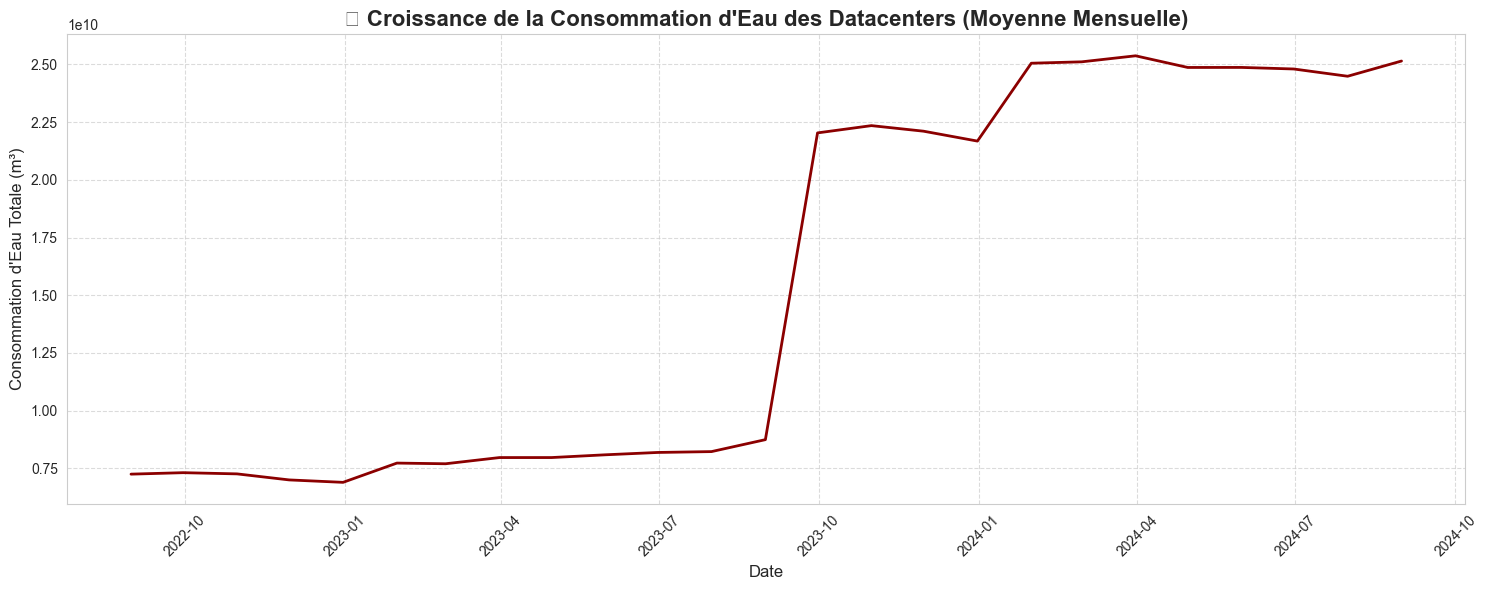

C:\Users\User.DESKTOP-R6U6E5L\AppData\Local\Temp\ipykernel_8000\1396146428.py:58: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\User.DESKTOP-R6U6E5L\Desktop\M2IA\energy\energy\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9889 (\N{HIGH VOLTAGE SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


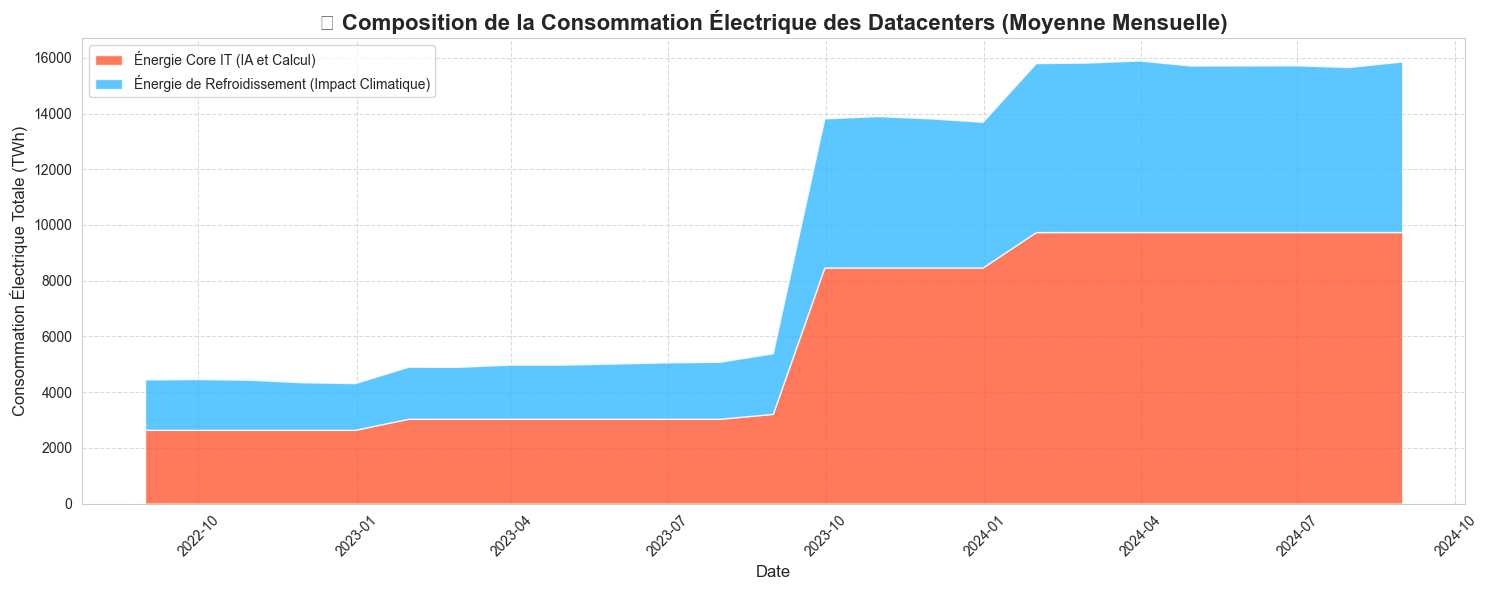

In [ ]:

# --- ÉTAPE 2: VISUALISATION DES RÉSULTATS MENSUELS ---

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 6) 

### 1. GRAPHIQUE DE LA CONSOMMATION D'EAU (GWC) - MOYENNE MENSUELLE
plt.figure(figsize=(15, 6))
sns.lineplot(x='timestamp', y='GWC_M3', data=df_mensuel, color='darkred', linewidth=2)
plt.title("💧 Croissance de la Consommation d'Eau des Datacenters (Moyenne Mensuelle)", 
          fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Consommation d'Eau Totale (m³)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# 

### 2. GRAPHIQUE DE LA CONSOMMATION ÉLECTRIQUE - MOYENNE MENSUELLE
plt.figure(figsize=(15, 6))

# Création des composantes pour le graphique à aires empilées (Stack Plot)
df_mensuel['EDC_TWh_core'] = df_mensuel['EDC_TWh']
df_mensuel['E_refroidissement_TWh_visu'] = df_mensuel['E_refroidissement_TWh']

# Utilisation du stackplot sur les données mensuelles
plt.stackplot(df_mensuel['timestamp'], 
              df_mensuel['EDC_TWh_core'], 
              df_mensuel['E_refroidissement_TWh_visu'], 
              labels=['Énergie Core IT (IA et Calcul)', 'Énergie de Refroidissement (Impact Climatique)'], 
              colors=['#FF5733', '#33B8FF'], 
              alpha=0.8)

plt.title("⚡ Composition de la Consommation Électrique des Datacenters (Moyenne Mensuelle)", 
          fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Consommation Électrique Totale (TWh)", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
#

C:\Users\User.DESKTOP-R6U6E5L\AppData\Local\Temp\ipykernel_8000\127900897.py:9: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\User.DESKTOP-R6U6E5L\AppData\Local\Temp\ipykernel_8000\127900897.py:9: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\User.DESKTOP-R6U6E5L\Desktop\M2IA\energy\energy\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\User.DESKTOP-R6U6E5L\Desktop\M2IA\energy\energy\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128168 (\N{DASH SYMBOL}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


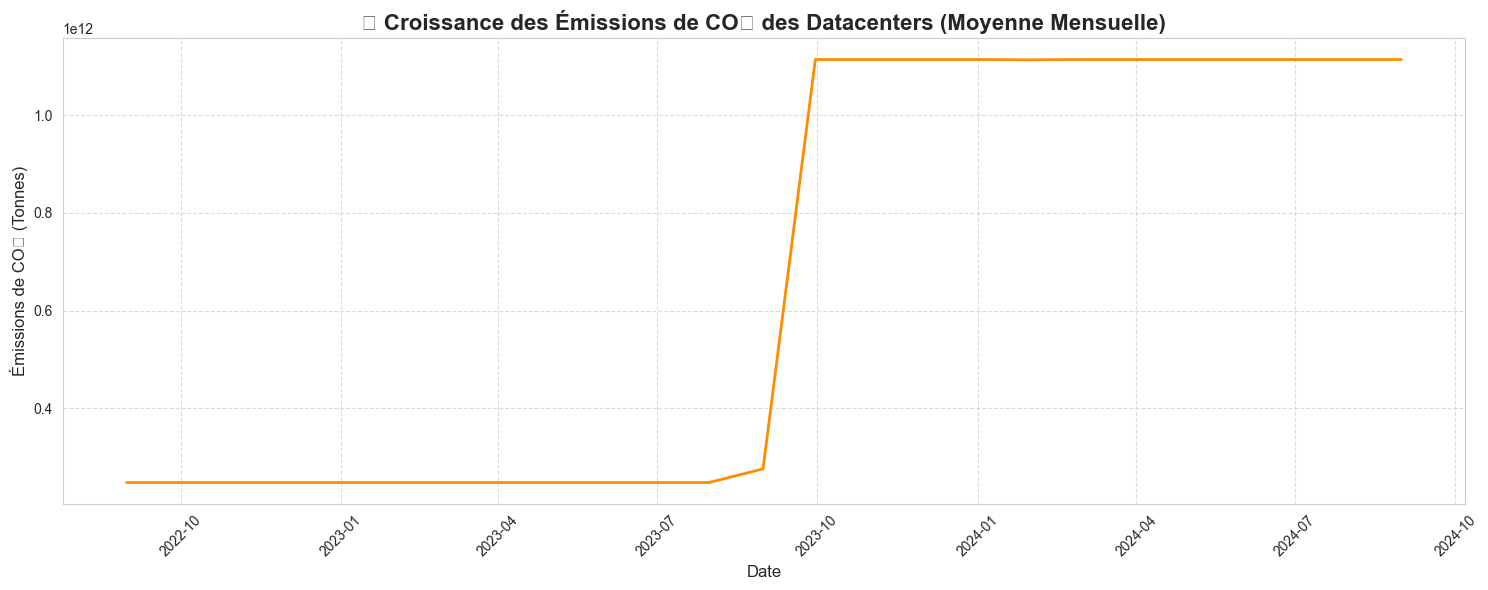

In [30]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='timestamp', y='Emissions_CO2_tonnes', data=df_mensuel, color='darkorange', linewidth=2)
plt.title("💨 Croissance des Émissions de CO₂ des Datacenters (Moyenne Mensuelle)", 
          fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Émissions de CO₂ (Tonnes)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\User.DESKTOP-R6U6E5L\AppData\Local\Temp\ipykernel_8000\460168208.py:82: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout(rect=[0, 0.03, 1, 0.95])
c:\Users\User.DESKTOP-R6U6E5L\Desktop\M2IA\energy\energy\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


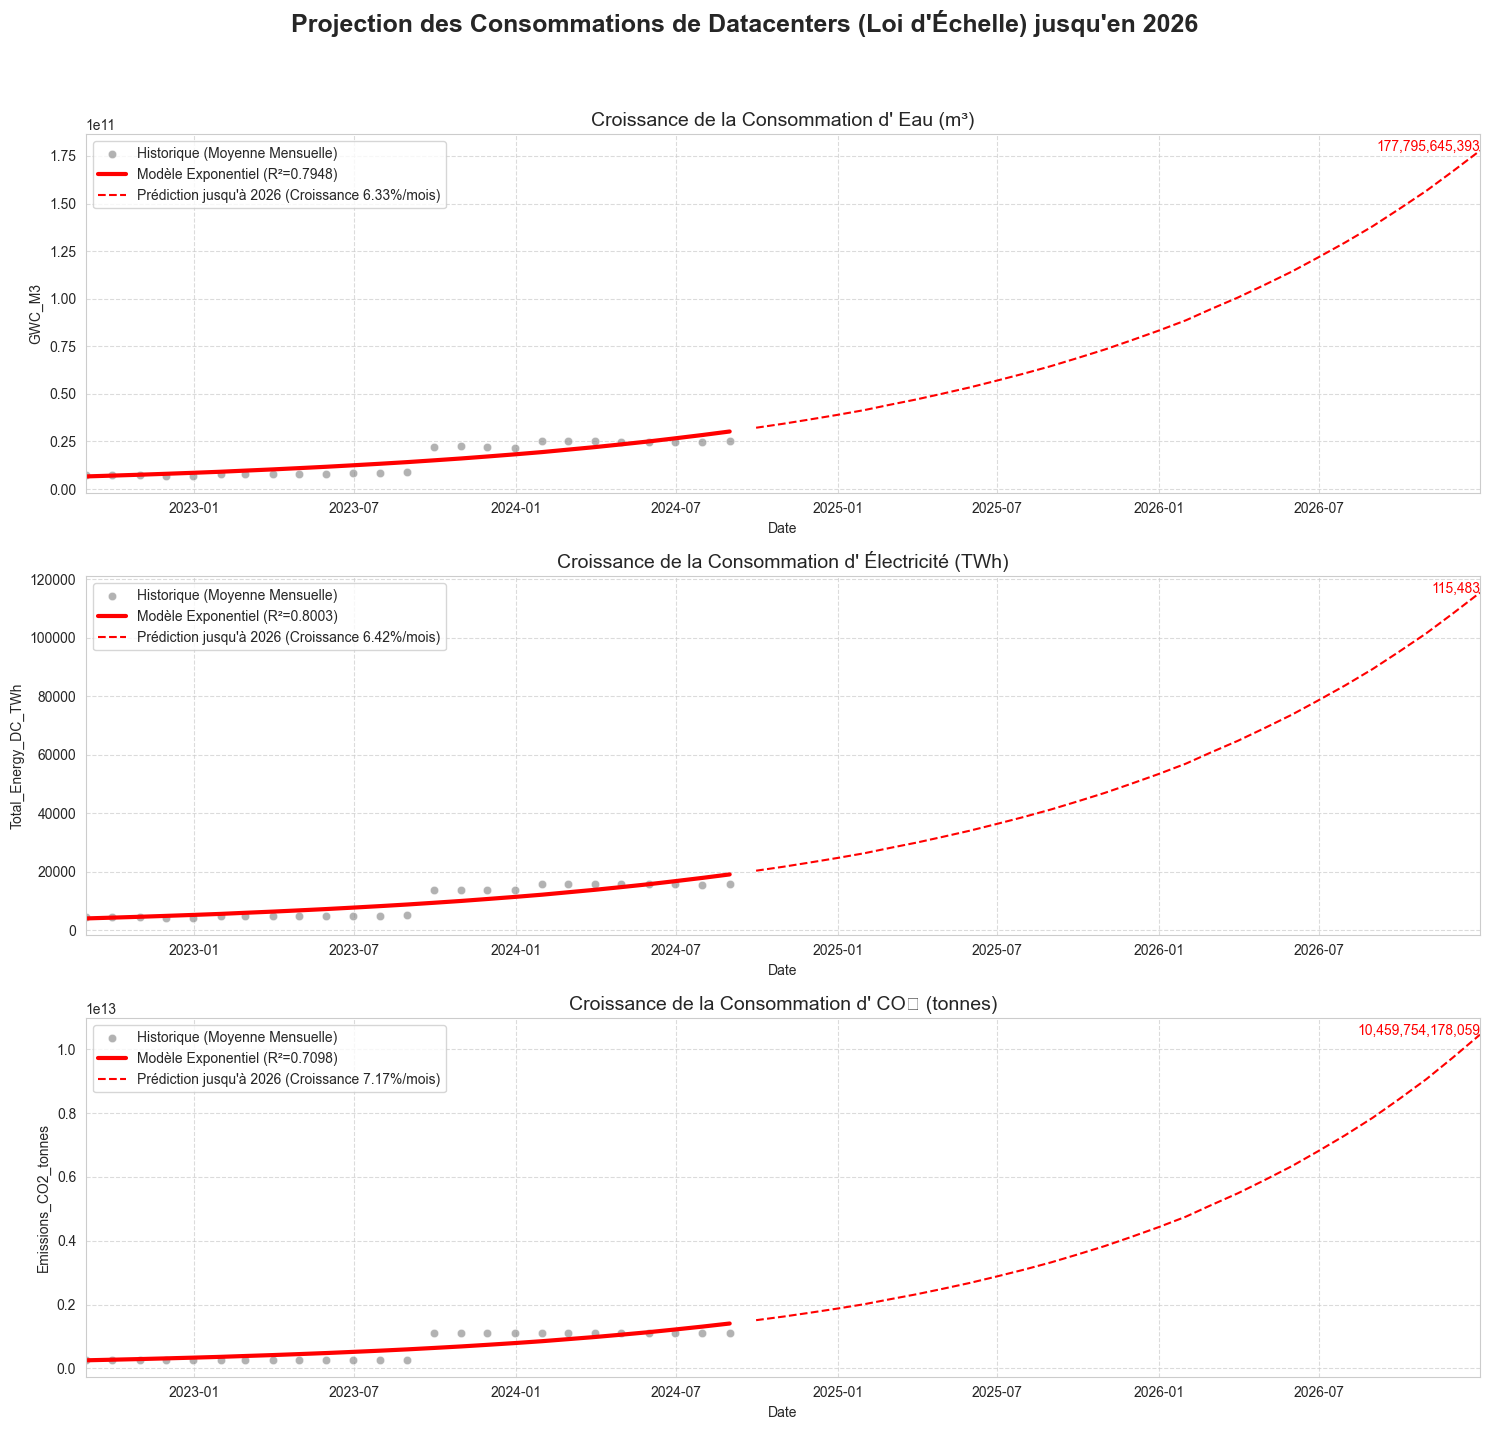


--- Analyse de la Prédiction 2026 ---
** Eau (m³) (Fin 2026) ** : 177,795,645,393 M3 (Croissance Mensuelle : 6.33%)
** Électricité (TWh) (Fin 2026) ** : 115,483 TWh (Croissance Mensuelle : 6.42%)
** CO₂ (tonnes) (Fin 2026) ** : 10,459,754,178,059 tonnes (Croissance Mensuelle : 7.17%)


In [ ]:
# --- DÉFINITION DE LA FONCTION MODÈLE (NÉCESSAIRE POUR LA PRÉDICTION) ---
def exponential_func(t, A, B):
    return A * np.exp(B * t)

# --- 1. DÉFINITION DE LA PÉRIODE DE PRÉDICTION ---
# Date de fin de prédiction fixée à la fin de 2026
DATE_FIN_PREDICTION = pd.to_datetime('2026-12-31') 
# Dernière date dans votre dataset (assumé max dans df_mensuel)
last_date = df_mensuel['timestamp'].max()

# Nombre de mois à ajouter à la fin de votre dataset
nb_mois_a_predire = (DATE_FIN_PREDICTION.year - last_date.year) * 12 + (DATE_FIN_PREDICTION.month - last_date.month)


# --- 2. VISUALISATION DES MODÈLES OBTENUS AVEC PROJECTION 2026 ---
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
plt.suptitle("Projection des Consommations de Datacenters (Loi d'Échelle) jusqu'en 2026", 
             fontsize=18, fontweight='bold')

variables_a_modeliser = {
    'GWC_M3': 'Eau (m³)',
    'Total_Energy_DC_TWh': 'Électricité (TWh)',
    'Emissions_CO2_tonnes': 'CO₂ (tonnes)'
}

for i, (colonne, nom_variable) in enumerate(variables_a_modeliser.items()):
    ax = axes[i]
    if colonne in resultats_regression:
        A = resultats_regression[colonne]['A']
        B = resultats_regression[colonne]['B']
        R2 = resultats_regression[colonne]['R2']

        # --- Données Historiques (Tracé habituel) ---
        sns.scatterplot(x=df_mensuel['timestamp'], y=df_mensuel[colonne], 
                        label='Historique (Moyenne Mensuelle)', ax=ax, color='grey', alpha=0.6)
        
        # Courbe de régression sur les données existantes
        ax.plot(df_mensuel['timestamp'], exponential_func(df_mensuel['t_mois'], A, B), 
                color='red', 
                label=f'Modèle Exponentiel (R²={R2:.4f})', 
                linewidth=3)
        
        # --- CALCUL ET TRACÉ DE LA PRÉDICTION 2026 ---
        
        t_max_actuel = df_mensuel['t_mois'].max()
        
        # Calcul des points de temps futurs
        t_futur = np.arange(t_max_actuel + 1, t_max_actuel + nb_mois_a_predire + 1)
        
        # Calcul des valeurs prédites pour 2026
        pred_2026 = exponential_func(t_futur, A, B)
        
        # Créer les dates futures pour le tracé
        dates_futur = pd.to_datetime([last_date + pd.DateOffset(months=m) 
                                      for m in range(1, nb_mois_a_predire + 1)])
        
        # Tracé de la projection (en pointillé)
        ax.plot(dates_futur, pred_2026, 'r--', label=f'Prédiction jusqu\'à 2026 (Croissance {B*100:.2f}%/mois)')
        
        # Étendre l'axe X pour inclure 2026
        ax.set_xlim(df_mensuel['timestamp'].min(), dates_futur[-1])
        
        ax.set_title(f"Croissance de la Consommation d' {nom_variable}", fontsize=14)
        ax.set_xlabel("Date")
        ax.set_ylabel(colonne)
        ax.legend(loc='upper left')
        ax.grid(True, linestyle='--', alpha=0.7)
        
        # Afficher la valeur finale de 2026 pour une interprétation facile
        ax.text(dates_futur[-1], pred_2026[-1], 
                f"{pred_2026[-1]:,.0f}", 
                fontsize=10, 
                color='red', 
                ha='right')
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("\n--- Analyse de la Prédiction 2026 ---")
for colonne, resultats in resultats_regression.items():
    if colonne in variables_a_modeliser:
        A = resultats['A']
        B = resultats['B']
        # Calculer l'indice t pour Décembre 2026
        t_2026 = t_max_actuel + nb_mois_a_predire
        
        valeur_2026 = exponential_func(t_2026, A, B)
        
        nom = variables_a_modeliser[colonne]
        
        print(f"** {nom} (Fin 2026) ** : {valeur_2026:,.0f} {colonne.split('(')[0].split('_')[-1]} (Croissance Mensuelle : {B * 100:.2f}%)")

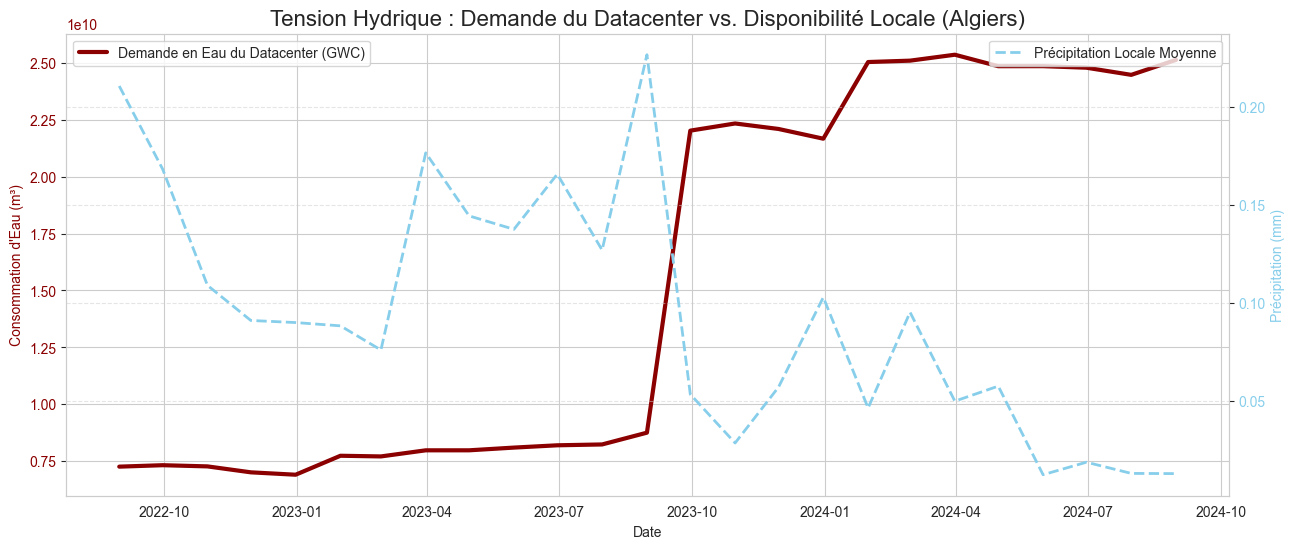

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- DÉFINITION SÛRE DU NOM DE LA VILLE ---
# On prend le nom de la ville dans le DataFrame d'origine (df_water)
# C'est la solution la plus fiable pour une analyse mono-ville.
city_name = df_water['city'].iloc[0] 
# ------------------------------------------

plt.figure(figsize=(15, 6))

# Axe Y1 : Consommation d'eau du datacenter
sns.lineplot(x='timestamp', y='GWC_M3', data=df_mensuel, color='darkred', label="Demande en Eau du Datacenter (GWC)", linewidth=3)
plt.ylabel("Consommation d'Eau (m³)", color='darkred')
plt.tick_params(axis='y', labelcolor='darkred')
plt.xlabel("Date")

# Créer un second axe Y pour la précipitation
ax2 = plt.gca().twinx()
# Axe Y2 : Précipitation locale
sns.lineplot(x='timestamp', y='precipitation', data=df_mensuel, ax=ax2, color='skyblue', label="Précipitation Locale Moyenne", linewidth=2, linestyle='--')
ax2.set_ylabel("Précipitation (mm)", color='skyblue')
ax2.tick_params(axis='y', labelcolor='skyblue')

# Ligne du titre corrigée
plt.title(f"Tension Hydrique : Demande du Datacenter vs. Disponibilité Locale ({city_name})", fontsize=16)

plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

# La Loi d'Échelle Formelle (Régression Log-Linéaire)

$$
\ln(\text{Total\_Energy}_{\text{DC}}) = \beta_0 + \beta_1 \cdot t_{\text{mois}} + \beta_2 \cdot T_{\text{humide}} + \epsilon
$$

## 🔬 La Loi d'Échelle Formelle : Modéliser l'Impact de l'IA

### 1. À Quoi Sert cette Loi d'Échelle ?

L'objectif principal de cette modélisation est de **quantifier et de prédire l'impact environnemental** (énergie, eau, $\text{CO}_2$) des datacenters en fonction des deux forces motrices de l'industrie de l'IA :

1.  **La Croissance de la Demande (Loi d'Échelle) :** La demande de puissance de calcul et la taille des modèles augmentent de manière exponentielle (loi d'échelle).
2.  **L'Influence du Climat (Efficacité) :** Les conditions climatiques locales affectent directement l'efficacité des datacenters (via le PUE).

En d'autres termes, cette loi d'échelle permet de répondre à la question : **"Si la tendance actuelle de croissance se maintient, et en tenant compte de la réalité climatique locale, quelle sera la consommation totale en 2026 ?"** C'est le fondement de votre **Scénario Pessimiste**.

---

### 2. Ce que Fait la Régression Log-Linéaire

La formule mathématique utilisée est une **Régression Linéaire Multiple** appliquée à une variable transformée (le logarithme de la consommation).



### La Loi d'Échelle Formelle (Log-Linéaire)

$$
\ln(\text{Total\_Energy}_{\text{DC}}) = \beta_0 + \beta_1 \cdot t_{\text{mois}} + \beta_2 \cdot T_{\text{humide}} + \epsilon
$$

---

Voici ce que fait chaque composante dans le modèle :

#### A. Linéarisation de la Croissance ($\ln(\text{Y})$)

* **Pourquoi le Logarithme ?** La consommation d'énergie des datacenters augmente de façon exponentielle. L'opération mathématique $\ln(Y)$ transforme cette croissance exponentielle en une relation **linéaire** simple.
* **Résultat :** Le modèle peut ainsi être analysé avec des outils de régression standard (OLS), assurant des résultats statistiques robustes ($R^2$, P-valeurs).

#### B. Quantification de la Demande ($\beta_1 \cdot t_{\text{mois}}$)

* **Le Rôle :** Le temps écoulé ($t_{\text{mois}}$) agit comme un *proxy* (variable substitut) pour l'augmentation de la complexité des modèles et de l'adoption de l'IA (la vraie Loi d'Échelle).
* **Interprétation :** Le coefficient $\beta_1$ que le modèle calcule est l'exposant qui définit la vitesse de cette croissance. La **Loi d'Échelle de la Demande** est ainsi directement quantifiée, vous fournissant le taux de croissance mensuel critique.

#### C. Intégration du Climat ($\beta_2 \cdot T_{\text{humide}}$)

* **Le Rôle :** Le terme $\beta_2 \cdot T_{\text{humide}}$ ajoute la dimension physique au modèle, en capturant l'impact du climat sur l'efficacité du refroidissement (PUE).
* **Interprétation :** Le coefficient $\beta_2$ mesure l'impact direct de la chaleur. S'il est positif et significatif, il prouve statistiquement que l'augmentation de la température humide aggrave l'impact énergétique total du datacenter, car le PUE augmente et le refroidissement consomme plus.

En combinant ces deux forces, cette loi d'échelle vous permet de séparer et de mesurer avec précision l'impact de la simple croissance de l'IA (le temps) de l'impact des conditions locales (le climat), offrant une analyse plus nuancée et plus crédible.

In [50]:
df_reg = df_mensuel.copy()

# Assurez-vous que la colonne 't_mois' est présente
# NOTE: Cette colonne a été créée lors de la régression exponentielle précédente.
if 't_mois' not in df_reg.columns:
    print("Erreur : La colonne 't_mois' n'est pas trouvée. Veuillez relancer l'étape de création de 't_mois'.")
    # Pour la sûreté, on recrée 't_mois' au cas où l'utilisateur l'aurait perdue
    df_reg['t_mois'] = (
        (df_reg['timestamp'].dt.year - df_reg['timestamp'].dt.year.min()) * 12 +
        (df_reg['timestamp'].dt.month - df_reg['timestamp'].dt.month.min())
    )


# 2. Créer la Variable Dépendante (Y) : Logarithme de la consommation totale
# np.log(Y) permet de transformer la relation exponentielle en relation linéaire
df_reg['log_Total_Energy_DC'] = np.log(df_reg['Total_Energy_DC_TWh'])

# 3. Définir les Variables Indépendantes (X)
# X1 : t_mois (Loi d'Échelle de la Demande)
# X2 : wetbulb_temperature (Loi d'Échelle de l'Efficacité/Climat)
X = df_reg[['t_mois', 'wetbulb_temperature']]
X = sm.add_constant(X) # Ajout de l'ordonnée à l'origine (β₀)

Y = df_reg['log_Total_Energy_DC']

# --- 4. EXÉCUTION DU MODÈLE DE RÉGRESSION OLS ---
# OLS = Ordinary Least Squares (Moindres Carrés Ordinaires)
model = sm.OLS(Y, X).fit()

# --- 5. AFFICHAGE ET INTERPRÉTATION ---
print("==================================================================")
print("  RÉSULTATS DE LA LOI D'ÉCHELLE EMPIRIQUE MULTI-FACTORIELLE (OLS)  ")
print("==================================================================")
print(model.summary())
print("==================================================================")

# --- Interprétation des Coefficients Clés ---

# Coefficient de la Loi d'Échelle (β₁)
beta1 = model.params['t_mois']
croissance_mensuelle = np.exp(beta1) - 1

# Coefficient de l'Impact Climatique (β₂)
beta2 = model.params['wetbulb_temperature']

print("\n--- INTERPRÉTATIONS CLÉS ---")
print(f"1. Taux de Croissance Mensuel (β₁) : {croissance_mensuelle * 100:.4f}%")
print(f"   -> Ce taux représente la **Loi d'Échelle de la Demande** : l'augmentation mensuelle de la consommation due à la seule croissance du marché/modèle IA.")

print(f"\n2. Impact Climatique (β₂) : {beta2:.6f}")
print("   -> Ce coefficient représente **l'Impact de l'Efficacité** : l'augmentation du log de la consommation par degré d'augmentation de la Température Humide.")
print(f"   -> Un $\\beta_2$ positif prouve que le climat local aggrave la consommation énergétique totale.")

Erreur : La colonne 't_mois' n'est pas trouvée. Veuillez relancer l'étape de création de 't_mois'.
  RÉSULTATS DE LA LOI D'ÉCHELLE EMPIRIQUE MULTI-FACTORIELLE (OLS)  
                             OLS Regression Results                            
Dep. Variable:     log_Total_Energy_DC   R-squared:                       0.881
Model:                             OLS   Adj. R-squared:                  0.870
Method:                  Least Squares   F-statistic:                     81.28
Date:                 Wed, 03 Dec 2025   Prob (F-statistic):           6.90e-11
Time:                         16:28:43   Log-Likelihood:                 4.8556
No. Observations:                   25   AIC:                            -3.711
Df Residuals:                       22   BIC:                          -0.05455
Df Model:                            2                                         
Covariance Type:             nonrobust                                         
                          coef   

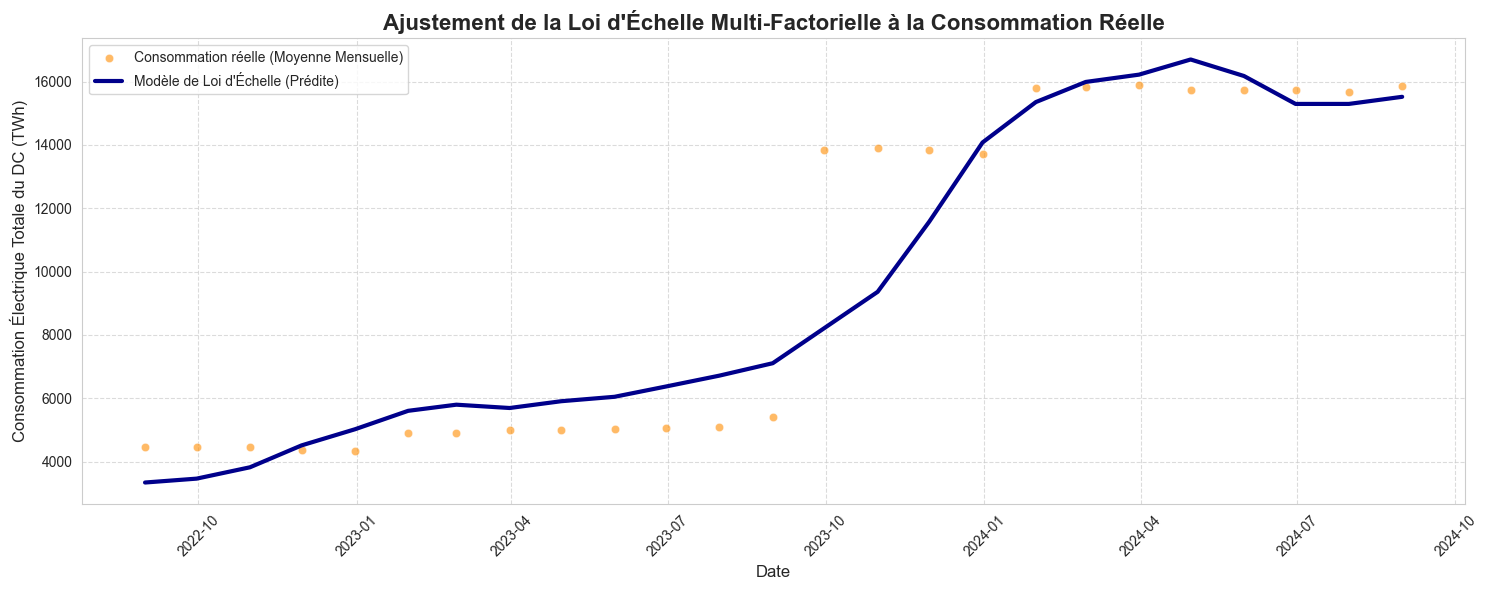

In [51]:

Y_pred_log = model.predict(X)

# Retour à l'échelle d'origine (TWh) en prenant l'exponentielle
df_reg['Total_Energy_Predicted_TWh'] = np.exp(Y_pred_log)

plt.figure(figsize=(15, 6))

# Tracé des données réelles
sns.scatterplot(x=df_reg['timestamp'], 
                y=df_reg['Total_Energy_DC_TWh'], 
                label='Consommation réelle (Moyenne Mensuelle)', 
                color='darkorange', alpha=0.6)

# Tracé des valeurs prédites par la Loi d'Échelle
sns.lineplot(x=df_reg['timestamp'], 
             y=df_reg['Total_Energy_Predicted_TWh'], 
             label='Modèle de Loi d\'Échelle (Prédite)', 
             color='darkblue', linewidth=3)

plt.title("Ajustement de la Loi d'Échelle Multi-Factorielle à la Consommation Réelle", fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Consommation Électrique Totale du DC (TWh)", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


--- Saisonnalité Climatique Moyenne (en °C) ---
timestamp
1     55.866176
2     56.642398
3     58.580345
4     59.482347
5     61.487052
6     63.419937
7     64.523769
8     65.385950
9     64.747658
10    63.234550
11    59.503496
12    56.901187
Name: wetbulb_temperature, dtype: float64


C:\Users\User.DESKTOP-R6U6E5L\AppData\Local\Temp\ipykernel_8000\3284868327.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates_futur = pd.date_range(start=last_date + pd.DateOffset(months=1), end=DATE_FIN_PREDICTION, freq='M')


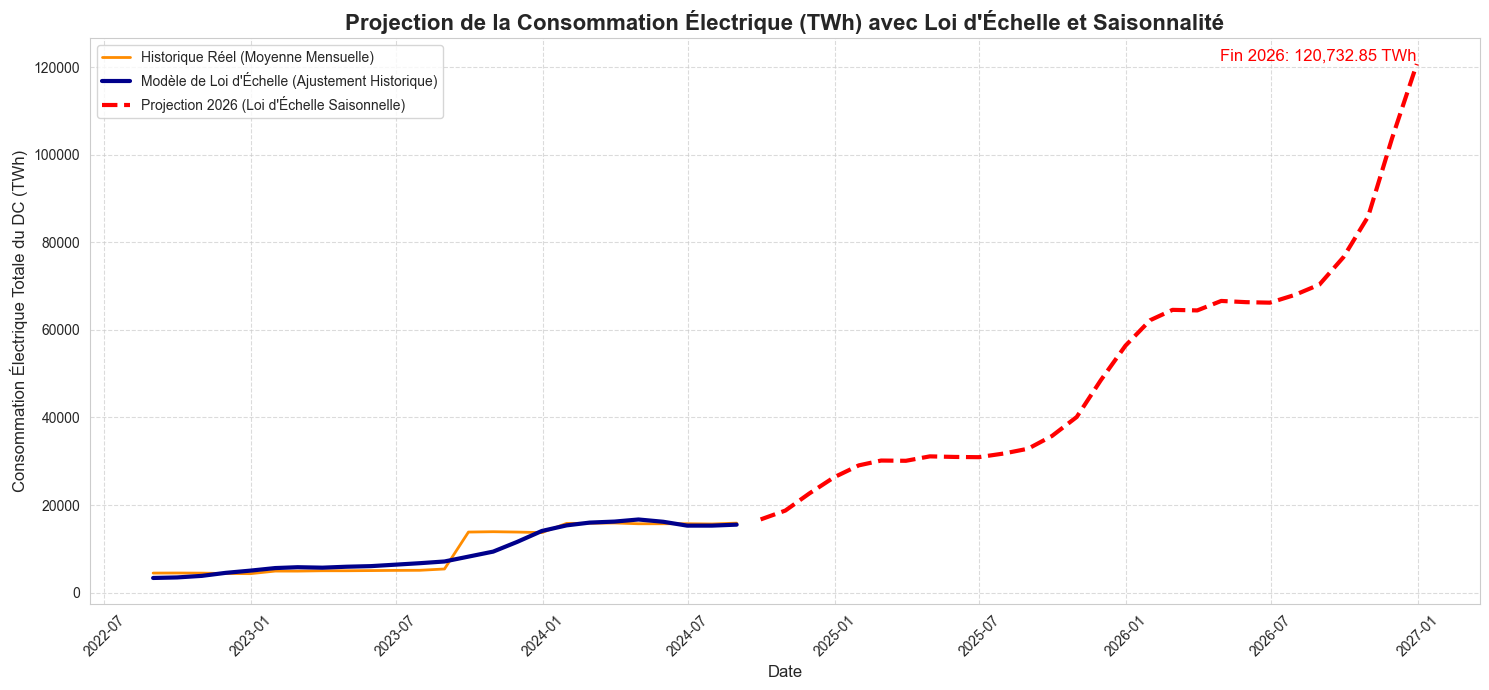


--- Analyse de la Prédiction 2026 (Consommation Totale Saisonalisée) ---
Le graphique inclut maintenant la tendance exponentielle (Loi d'Échelle) et les cycles saisonniers d'efficacité énergétique.


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- ÉTAPE 1 : CALCULER LA SAISONNALITÉ MOYENNE ---

# 1. Créer la moyenne de wetbulb_temperature pour chaque mois (saisonnalité)
saisonnalite_climatique = df_reg.groupby(df_reg['timestamp'].dt.month)['wetbulb_temperature'].mean()

print("\n--- Saisonnalité Climatique Moyenne (en °C) ---")
print(saisonnalite_climatique)


# --- ÉTAPE 2 : PRÉPARATION DES DONNÉES DE PRÉDICTION ---

DATE_FIN_PREDICTION = pd.to_datetime('2026-12-31')
last_date = df_reg['timestamp'].max()

# Créer les futures dates et la variable de temps (t)
dates_futur = pd.date_range(start=last_date + pd.DateOffset(months=1), end=DATE_FIN_PREDICTION, freq='M')
t_max_actuel = df_reg['t_mois'].max()
t_futur = np.arange(t_max_actuel + 1, t_max_actuel + len(dates_futur) + 1)

# Récupérer les numéros de mois futurs (1 à 12)
mois_futur = dates_futur.month

# ATTRIBUTION DE LA SAISONNALITÉ : Mettre en correspondance les mois futurs avec la moyenne historique
T_humide_futur_saisonnier_list = [saisonnalite_climatique[m] for m in mois_futur]

# LIGNE DE CORRECTION CRUCIALE : Convertir la liste en tableau NumPy
T_humide_futur_saisonnier = np.array(T_humide_futur_saisonnier_list) 
# -------------------------------------------------------------


# --- ÉTAPE 3 : CALCUL DE LA PRÉDICTION SAISONNALISÉE ---

# Coefficients du modèle OLS (assumés disponibles)
beta0 = model.params['const']
beta1 = model.params['t_mois']
beta2 = model.params['wetbulb_temperature']

# Formule du modèle (Log-Linéaire)
# Cette ligne ne doit plus générer de TypeError
Y_pred_log_saison = beta0 + (beta1 * t_futur) + (beta2 * T_humide_futur_saisonnier)

# Conversion du Log au TWh réel
pred_2026_twh_saison = np.exp(Y_pred_log_saison)


# --- ÉTAPE 4 : TRACÉ DE LA PROJECTION (MISE À JOUR) ---

plt.figure(figsize=(15, 7))

# Tracé des données historiques réelles
sns.lineplot(x=df_reg['timestamp'], y=df_reg['Total_Energy_DC_TWh'], 
             label='Historique Réel (Moyenne Mensuelle)', color='darkorange', linewidth=2)

# Tracé de la courbe de régression sur les données historiques
sns.lineplot(x=df_reg['timestamp'], y=df_reg['Total_Energy_Predicted_TWh'], 
             label='Modèle de Loi d\'Échelle (Ajustement Historique)', color='darkblue', linewidth=3, linestyle='-')

# Tracé de la projection 2026 AVEC SAISONNALITÉ
plt.plot(dates_futur, pred_2026_twh_saison, 'r--', label='Projection 2026 (Loi d\'Échelle Saisonnelle)', linewidth=3)


# --- Mise en Forme ---
plt.title(f"Projection de la Consommation Électrique (TWh) avec Loi d'Échelle et Saisonnalité", 
          fontsize=16, fontweight='bold')
plt.xlabel("Date", fontsize=12)
plt.ylabel("Consommation Électrique Totale du DC (TWh)", fontsize=12)
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)

# Afficher la valeur finale de 2026
valeur_2026_saison = pred_2026_twh_saison[-1]
plt.text(dates_futur[-1], valeur_2026_saison, 
         f"Fin 2026: {valeur_2026_saison:,.2f} TWh", 
         fontsize=12, color='red', ha='right', va='bottom')

plt.tight_layout()
plt.show()

print("\n--- Analyse de la Prédiction 2026 (Consommation Totale Saisonalisée) ---")
print("Le graphique inclut maintenant la tendance exponentielle (Loi d'Échelle) et les cycles saisonniers d'efficacité énergétique.")